<h1><b>Table of Contents</b></h1>

<h3><b>1. Data Exploration</b></h3>

The dataset is about bankruptcy prediction of Polish companies. The data was collected from Emerging Markets Information Service (EMIS, http://www.securities.com), which is a database containing information on emerging markets around the world. The bankrupt companies were analyzed in the period 2000-2012, while the still operating companies were evaluated from 2007 to 2013.


The data is divided into five different subsets:

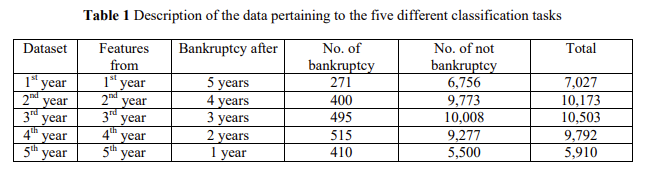

Source: Xia Xiaomao et al 2019 J. Phys.: Conf. Ser. 1284 012026




Polish company dataset of 3rd year considers 10,503 samples with 64 input financial attributes. The dataset is associated for binary classification tasks. During the years 2000–2012, the insolvent enterprises were examined, while the still operational firms were assessed between the years 2007 and 2013. The Polish dataset contains 10,008 non-bankrupt and 495 bankrupt samples.

<h4> a. Import library </h4>

In [1]:
# import necessary packages
import keras
import os
import time
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import math
from mlxtend.preprocessing import minmax_scaling

from sklearn.utils import resample

import pandas as pd
import numpy as np
import missingno as msno

import datetime

from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from xgboost import plot_importance 

# Plots
import seaborn as sns
sns.set()
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure, show, grid
%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

from sklearn.model_selection import train_test_split, StratifiedKFold
from imblearn.under_sampling import TomekLinks


from keras.callbacks import ModelCheckpoint
import tensorflow as tf
from tensorflow import keras

import sys
from scipy.io import arff

from collections import Counter
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

from sklearn.model_selection import GridSearchCV, KFold, RandomizedSearchCV
from keras.models import Sequential
from keras.layers import Dense, Dropout, InputLayer
from keras.wrappers.scikit_learn import KerasClassifier

#for RadomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

from mlxtend.evaluate import BootstrapOutOfBag

from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss


from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,confusion_matrix, classification_report,roc_curve, auc
# Library imbalanced-learn to deal with the data imbalance. To use SMOTE oversampling
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.combine import SMOTETomek
from sklearn.inspection import permutation_importance
from imblearn.under_sampling import EditedNearestNeighbours

In [2]:
from visualization_bankruptcy import corr_matrix, box_plot, distribution_plot, pair_plot, missing_percentage, outliers_plot, feature_plot

In [3]:
from visualization_bankruptcy import ROC, make_confusion_matrix, plot_history, select_threshold_fnr, thresh_pred, calc_fpr_fnr, display_metrics, boxplot_features

In [4]:
from preprocessing_bankruptcy import outliers_remove

In [5]:
from sklearn.pipeline import make_pipeline

<h4>b. Describe and clean the data</h4>

The dataset is read into a dataframe.

In [6]:
data = arff.loadarff('../dataset/Bankruptcy/3year.arff')
df = pd.DataFrame(data[0])

df.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7   Attr8  \
0  0.174190  0.41299  0.14371  1.3480 -28.9820  0.60383  0.219460  1.1225   
1  0.146240  0.46038  0.28230  1.6294   2.5952  0.00000  0.171850  1.1721   
2  0.000595  0.22612  0.48839  3.1599  84.8740  0.19114  0.004572  2.9881   
3  0.024526  0.43236  0.27546  1.7833 -10.1050  0.56944  0.024526  1.3057   
4  0.188290  0.41504  0.34231  1.9279 -58.2740  0.00000  0.233580  1.4094   

    Attr9   Attr10  ...    Attr56    Attr57   Attr58    Attr59  Attr60  \
0  1.1961  0.46359  ...  0.163960  0.375740  0.83604  0.000007  9.7145   
1  1.6018  0.53962  ...  0.027516  0.271000  0.90108  0.000000  5.9882   
2  1.0077  0.67566  ...  0.007639  0.000881  0.99236  0.000000  6.7742   
3  1.0509  0.56453  ...  0.048398  0.043445  0.95160  0.142980  4.2286   
4  1.3393  0.58496  ...  0.176480  0.321880  0.82635  0.073039  2.5912   

   Attr61   Attr62  Attr63  Attr64  class  
0  6.2813   84.291  4.3303  4.0341   b'0'  
1  4.1103  102.190  3.5716  5.9500   b'0'  
2  3.7922   64.846  5.6287  4.4581   b'0'  
3  5.0528   98.783  3.6950  3.4844   b'0'  
4  7.0756  100.540  3.6303  4.6375   b'0'  

[5 rows x 65 columns]

In [7]:
# Decode class variable and make it an integer
df['class'] = df['class'].apply(lambda x: x.decode("utf-8")).astype(str).astype(int)
df.head()

Attr1    Attr2    Attr3   Attr4    Attr5    Attr6     Attr7   Attr8  \
0  0.174190  0.41299  0.14371  1.3480 -28.9820  0.60383  0.219460  1.1225   
1  0.146240  0.46038  0.28230  1.6294   2.5952  0.00000  0.171850  1.1721   
2  0.000595  0.22612  0.48839  3.1599  84.8740  0.19114  0.004572  2.9881   
3  0.024526  0.43236  0.27546  1.7833 -10.1050  0.56944  0.024526  1.3057   
4  0.188290  0.41504  0.34231  1.9279 -58.2740  0.00000  0.233580  1.4094   

    Attr9   Attr10  ...    Attr56    Attr57   Attr58    Attr59  Attr60  \
0  1.1961  0.46359  ...  0.163960  0.375740  0.83604  0.000007  9.7145   
1  1.6018  0.53962  ...  0.027516  0.271000  0.90108  0.000000  5.9882   
2  1.0077  0.67566  ...  0.007639  0.000881  0.99236  0.000000  6.7742   
3  1.0509  0.56453  ...  0.048398  0.043445  0.95160  0.142980  4.2286   
4  1.3393  0.58496  ...  0.176480  0.321880  0.82635  0.073039  2.5912   

   Attr61   Attr62  Attr63  Attr64  class  
0  6.2813   84.291  4.3303  4.0341      0  
1  4.1103  102.190  3.5716  5.9500      0  
2  3.7922   64.846  5.6287  4.4581      0  
3  5.0528   98.783  3.6950  3.4844      0  
4  7.0756  100.540  3.6303  4.6375      0  

[5 rows x 65 columns]

In [8]:
df.to_csv('../dataset/Bankruptcy/3year.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10503 entries, 0 to 10502
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr1   10503 non-null  float64
 1   Attr2   10503 non-null  float64
 2   Attr3   10503 non-null  float64
 3   Attr4   10485 non-null  float64
 4   Attr5   10478 non-null  float64
 5   Attr6   10503 non-null  float64
 6   Attr7   10503 non-null  float64
 7   Attr8   10489 non-null  float64
 8   Attr9   10500 non-null  float64
 9   Attr10  10503 non-null  float64
 10  Attr11  10503 non-null  float64
 11  Attr12  10485 non-null  float64
 12  Attr13  10460 non-null  float64
 13  Attr14  10503 non-null  float64
 14  Attr15  10495 non-null  float64
 15  Attr16  10489 non-null  float64
 16  Attr17  10489 non-null  float64
 17  Attr18  10503 non-null  float64
 18  Attr19  10460 non-null  float64
 19  Attr20  10460 non-null  float64
 20  Attr21  9696 non-null   float64
 21  Attr22  10503 non-null  float64
 22

Now, we will understand the format of data

In [10]:
df.shape

(10503, 65)

In [11]:
#learning about the columns
df.columns

Index(['Attr1', 'Attr2', 'Attr3', 'Attr4', 'Attr5', 'Attr6', 'Attr7', 'Attr8',
       'Attr9', 'Attr10', 'Attr11', 'Attr12', 'Attr13', 'Attr14', 'Attr15',
       'Attr16', 'Attr17', 'Attr18', 'Attr19', 'Attr20', 'Attr21', 'Attr22',
       'Attr23', 'Attr24', 'Attr25', 'Attr26', 'Attr27', 'Attr28', 'Attr29',
       'Attr30', 'Attr31', 'Attr32', 'Attr33', 'Attr34', 'Attr35', 'Attr36',
       'Attr37', 'Attr38', 'Attr39', 'Attr40', 'Attr41', 'Attr42', 'Attr43',
       'Attr44', 'Attr45', 'Attr46', 'Attr47', 'Attr48', 'Attr49', 'Attr50',
       'Attr51', 'Attr52', 'Attr53', 'Attr54', 'Attr55', 'Attr56', 'Attr57',
       'Attr58', 'Attr59', 'Attr60', 'Attr61', 'Attr62', 'Attr63', 'Attr64',
       'class'],
      dtype='object')

<b>Now, let's understand the statistics that are generated by the describe() method:</b>
* count tells us the number of NoN-empty rows in a feature.
* mean tells us the mean value of that feature.
* std tells us the Standard Deviation Value of that feature.
* min tells us the minimum value of that feature.
* 25%, 50%, and 75% are the percentile/quartile of each features. This quartile information helps us to detect Outliers.
* max tells us the maximum value of that feature.

In [12]:
df.describe()

Attr1         Attr2         Attr3         Attr4         Attr5  \
count  10503.000000  10503.000000  10503.000000  10485.000000  1.047800e+04   
mean       0.052844      0.619911      0.095490      9.980499 -1.347662e+03   
std        0.647797      6.427041      6.420056    523.691951  1.185806e+05   
min      -17.692000      0.000000   -479.730000      0.002080 -1.190300e+07   
25%        0.000686      0.253955      0.017461      1.040100 -5.207075e+01   
50%        0.043034      0.464140      0.198560      1.605600  1.579300e+00   
75%        0.123805      0.689330      0.419545      2.959500  5.608400e+01   
max       52.652000    480.730000     17.708000  53433.000000  6.854400e+05   

              Attr6         Attr7         Attr8         Attr9        Attr10  \
count  10503.000000  10503.000000  10489.000000  10500.000000  10503.000000   
mean      -0.121159      0.065624     19.140113      1.819254      0.366093   
std        6.970625      0.651152    717.756745      7.581659      6.428603   
min     -508.120000    -17.692000     -2.081800     -1.215700   -479.730000   
25%        0.000000      0.002118      0.431270      1.011275      0.297340   
50%        0.000000      0.050945      1.111000      1.199000      0.515500   
75%        0.072584      0.142275      2.857100      2.059100      0.725635   
max       45.533000     52.652000  53432.000000    740.440000     11.837000   

       ...        Attr56        Attr57        Attr58        Attr59  \
count  ...  10460.000000  10503.000000  10474.000000  10503.000000   
mean   ...     -0.530082     -0.014817      3.848794      1.429319   
std    ...     55.978608     18.684047    190.201224     77.273270   
min    ...  -5691.700000  -1667.300000   -198.690000   -172.070000   
25%    ...      0.005137      0.006796      0.875560      0.000000   
50%    ...      0.051765      0.106880      0.953060      0.002976   
75%    ...      0.130010      0.271310      0.995927      0.240320   
max    ...    293.150000    552.640000  18118.000000   7617.300000   

             Attr60        Attr61        Attr62        Attr63        Attr64  \
count  9.911000e+03  10486.000000  1.046000e+04  10485.000000  10275.000000   
mean   5.713363e+02     13.935361  1.355370e+02      9.095149     35.766800   
std    3.715967e+04     83.704103  2.599116e+04     31.419096    428.298315   
min    0.000000e+00     -6.590300 -2.336500e+06     -0.000156     -0.000102   
25%    5.533150e+00      4.486075  4.073700e+01      3.062800      2.023350   
50%    9.952100e+00      6.677300  7.066400e+01      5.139200      4.059300   
75%    2.093600e+01     10.587500  1.182200e+02      8.882600      9.682750   
max    3.660200e+06   4470.400000  1.073500e+06   1974.500000  21499.000000   

              class  
count  10503.000000  
mean       0.047129  
std        0.211926  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 65 columns]

Features in the dataset

In [13]:
features = [i for i in df.columns]
features

['Attr1',
 'Attr2',
 'Attr3',
 'Attr4',
 'Attr5',
 'Attr6',
 'Attr7',
 'Attr8',
 'Attr9',
 'Attr10',
 'Attr11',
 'Attr12',
 'Attr13',
 'Attr14',
 'Attr15',
 'Attr16',
 'Attr17',
 'Attr18',
 'Attr19',
 'Attr20',
 'Attr21',
 'Attr22',
 'Attr23',
 'Attr24',
 'Attr25',
 'Attr26',
 'Attr27',
 'Attr28',
 'Attr29',
 'Attr30',
 'Attr31',
 'Attr32',
 'Attr33',
 'Attr34',
 'Attr35',
 'Attr36',
 'Attr37',
 'Attr38',
 'Attr39',
 'Attr40',
 'Attr41',
 'Attr42',
 'Attr43',
 'Attr44',
 'Attr45',
 'Attr46',
 'Attr47',
 'Attr48',
 'Attr49',
 'Attr50',
 'Attr51',
 'Attr52',
 'Attr53',
 'Attr54',
 'Attr55',
 'Attr56',
 'Attr57',
 'Attr58',
 'Attr59',
 'Attr60',
 'Attr61',
 'Attr62',
 'Attr63',
 'Attr64',
 'class']

<h3><b>2. Visualization </b></h3>

In [14]:
print(df['class'].value_counts())
print('Proportion of bankrupt companies:', round(410/(5500+410), 2))

0    10008
1      495
Name: class, dtype: int64
Proportion of bankrupt companies: 0.07


Number of Non-bankruptcy:  495
Number of Bankruptcy:  10008


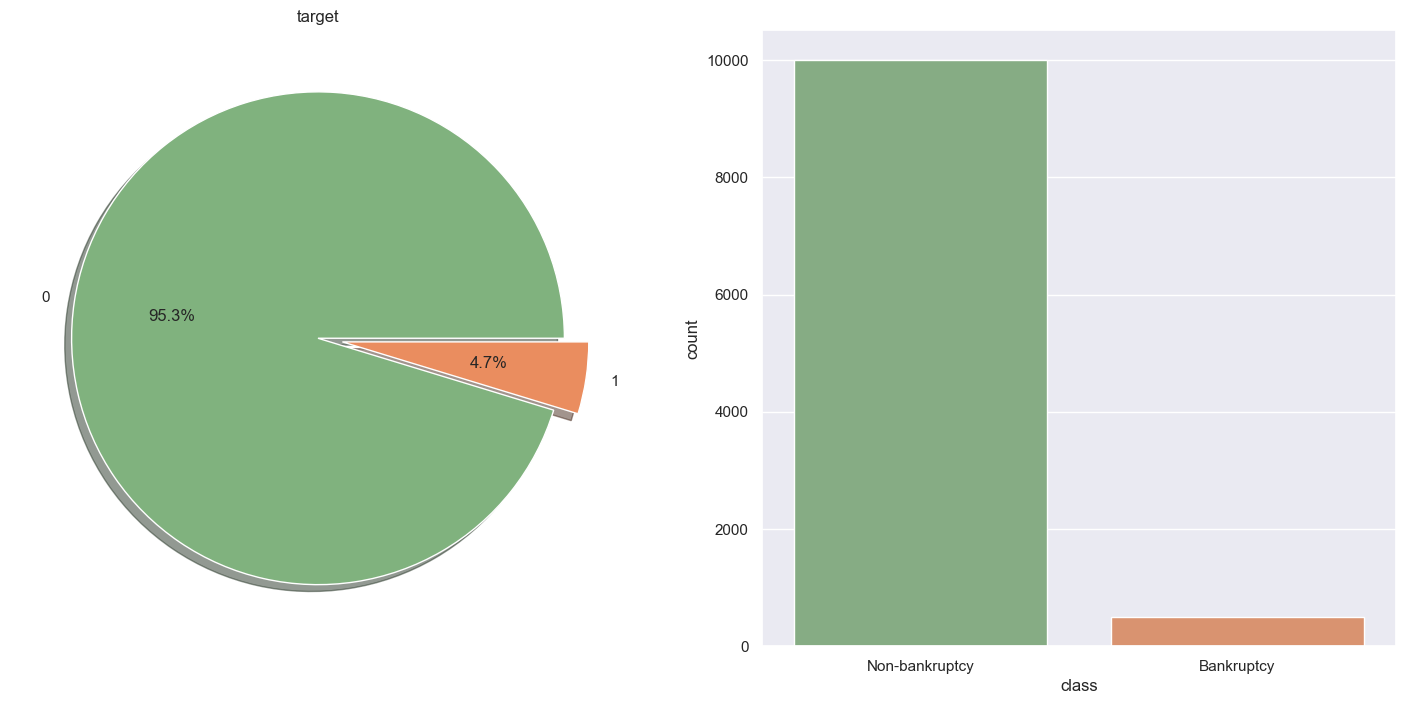

In [15]:
distribution_plot(df)

Correlation matrix 

<Figure size 3000x2000 with 0 Axes>

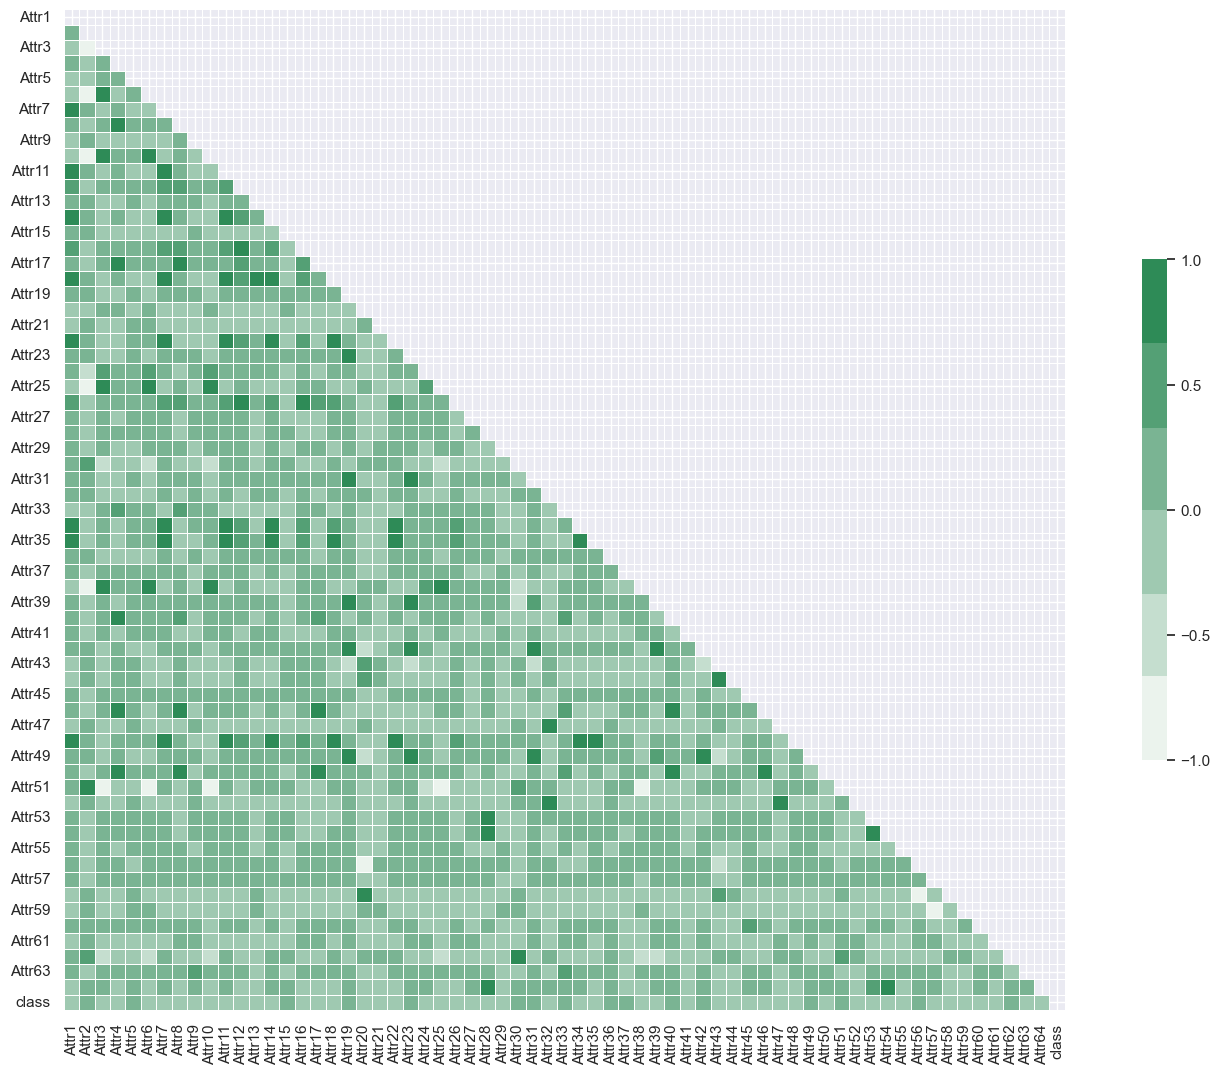

In [16]:
corr_matrix(df)

<h3><b>3. Distribution of features </b></h3>

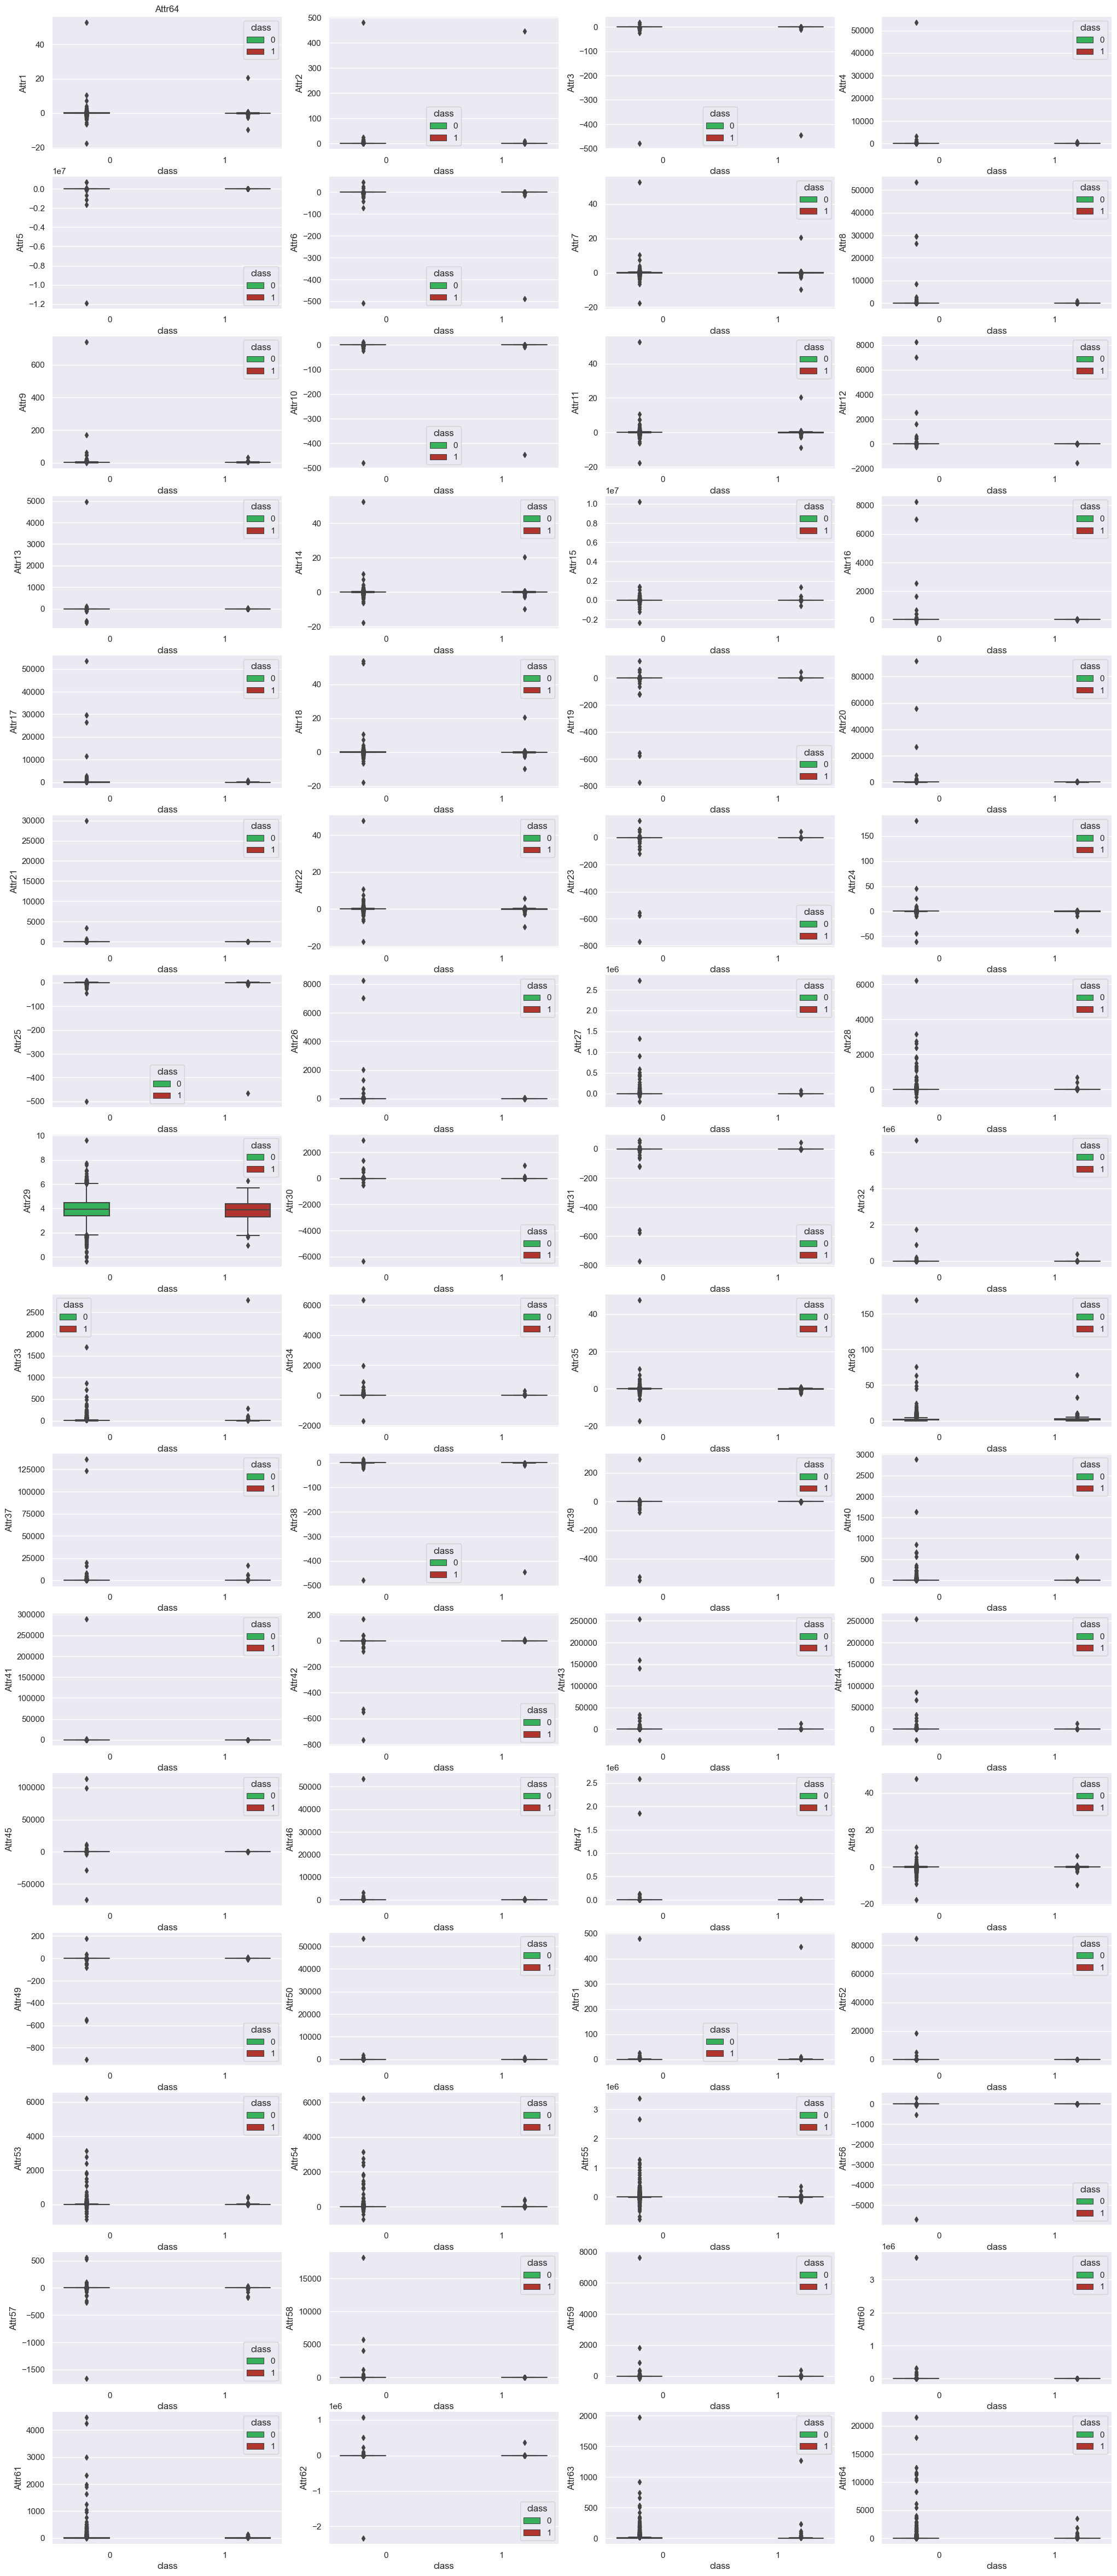

In [17]:
boxplot_features(df)

<h3><b>4. Missing values</b></h3>

<b> Visualizing the patterns of missing value occurrence <b>

In [18]:
df.isna().sum()

Attr1       0
Attr2       0
Attr3       0
Attr4      18
Attr5      25
         ... 
Attr61     17
Attr62     43
Attr63     18
Attr64    228
class       0
Length: 65, dtype: int64

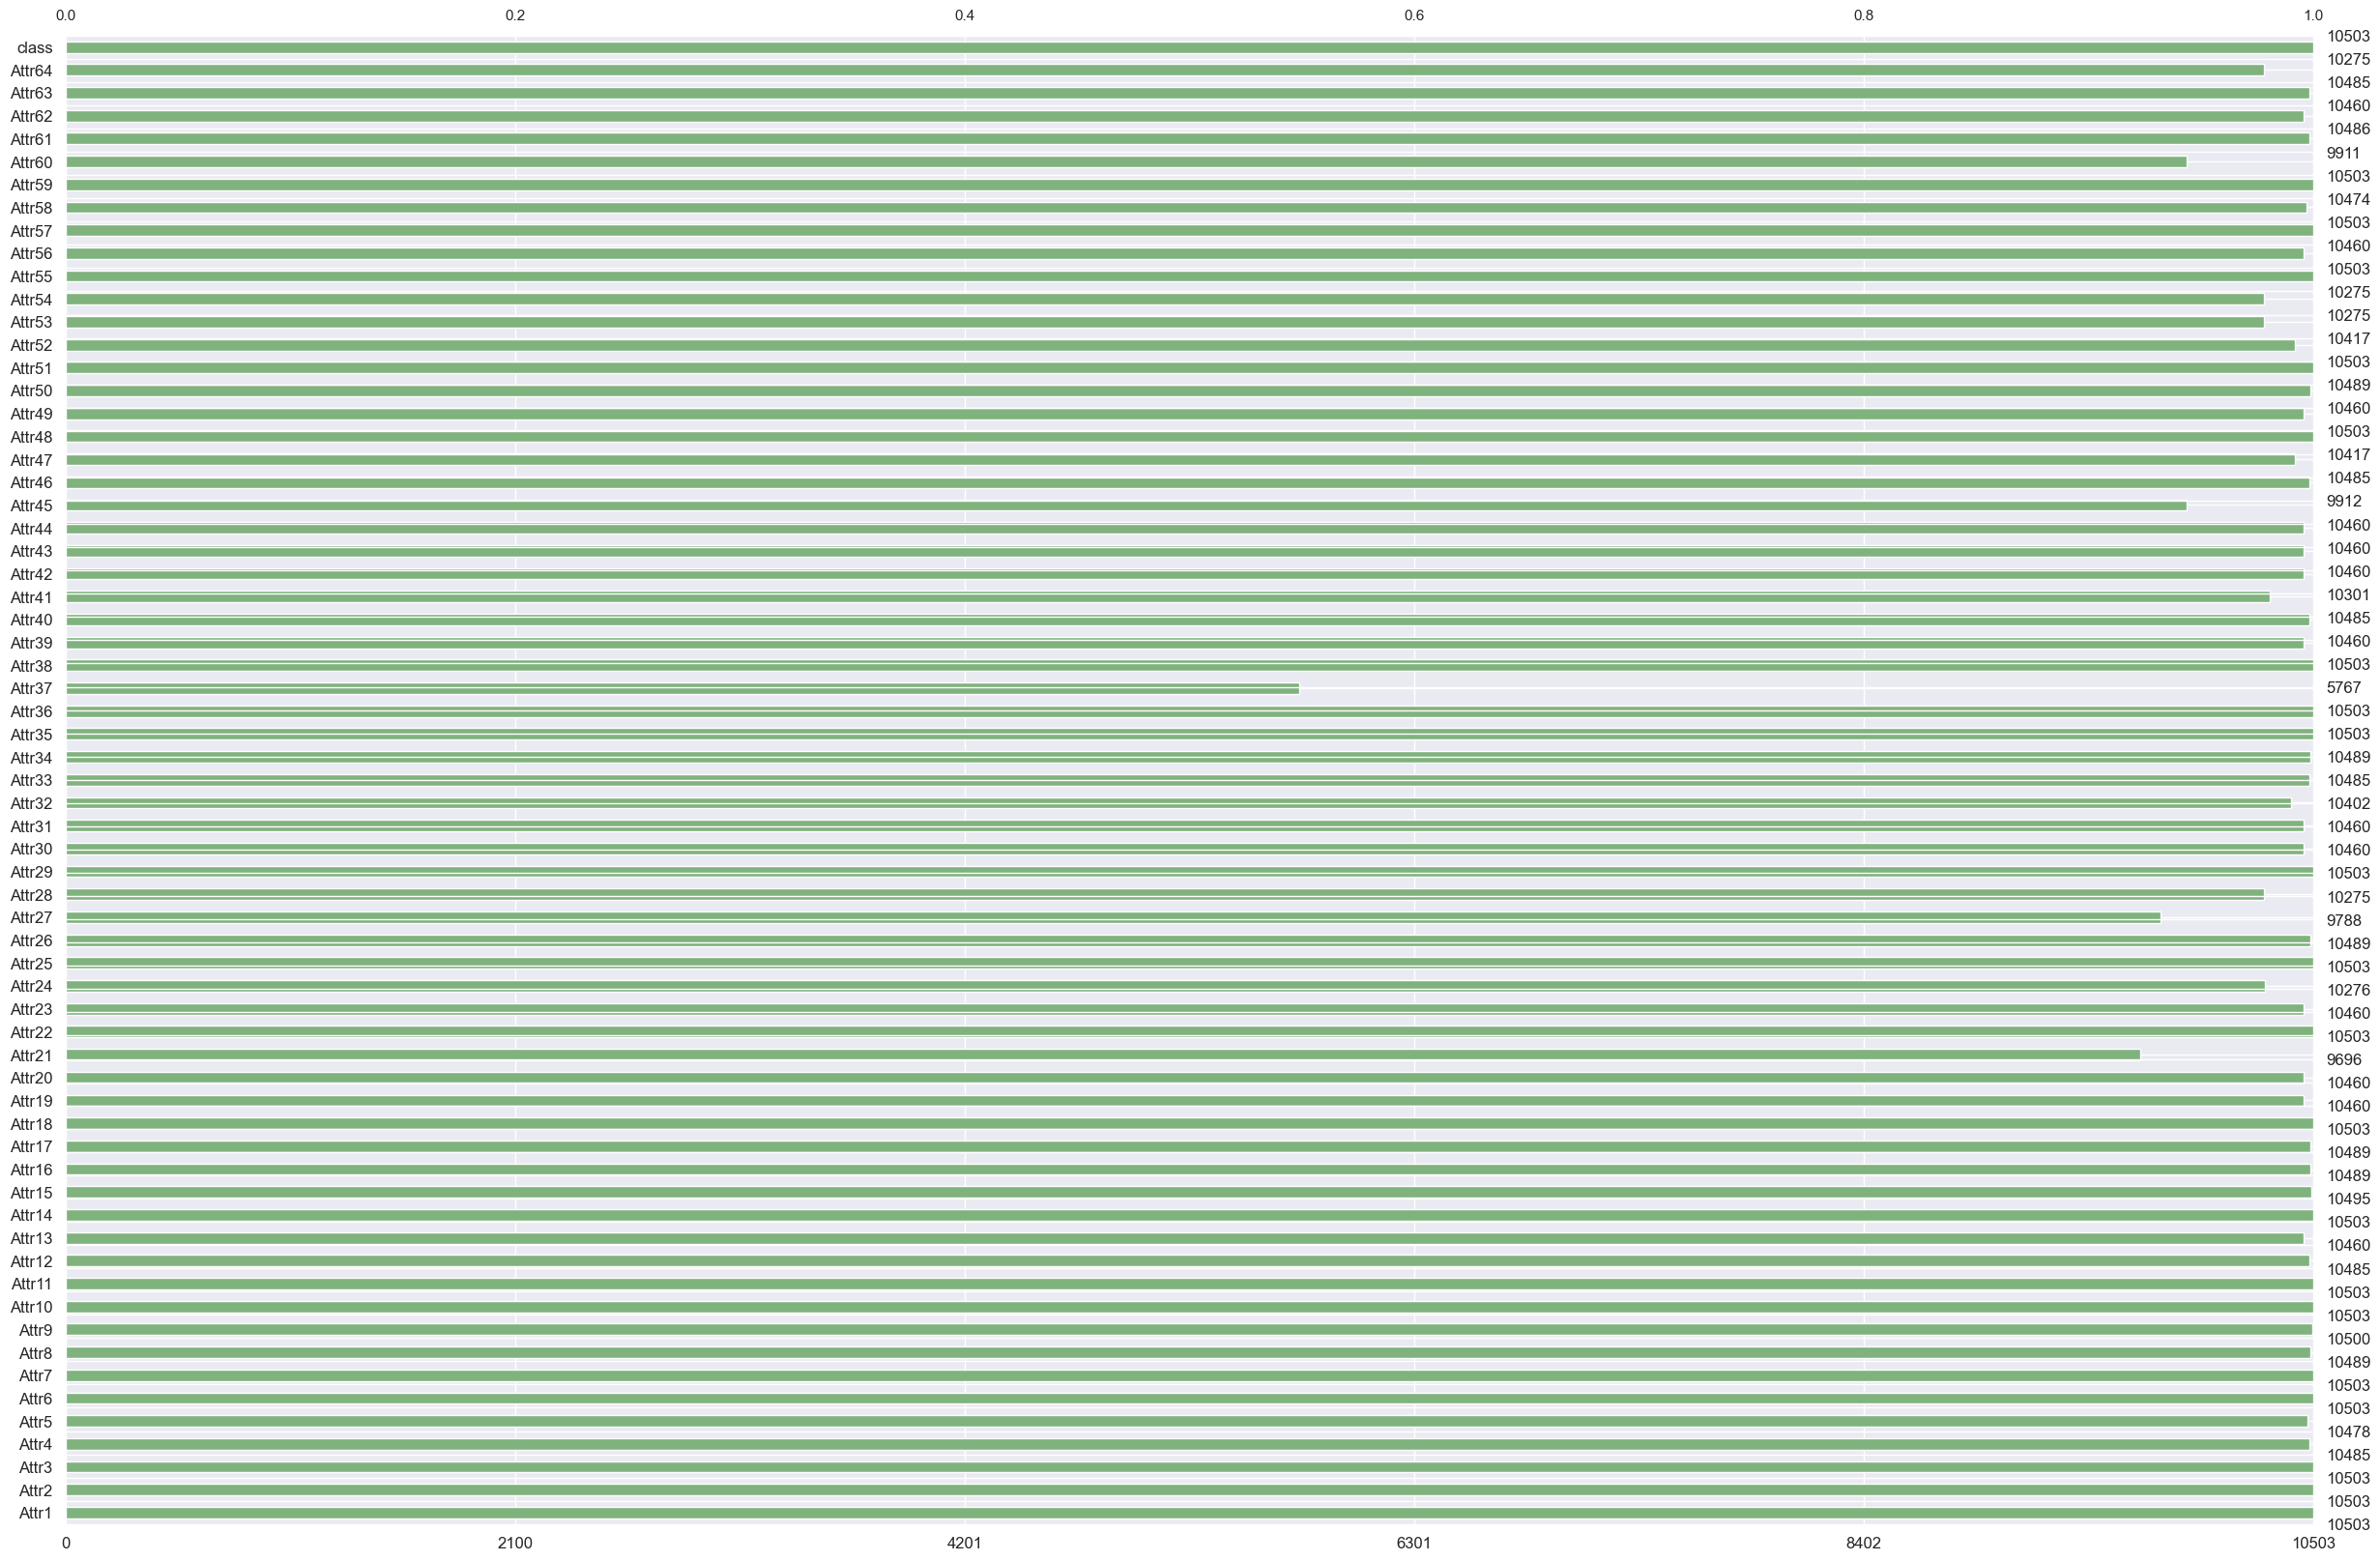

In [19]:
colors_palette3 = ['#80b27e']

p_all = msno.bar(df, figsize=(30,20), fontsize=12, color  = colors_palette3)

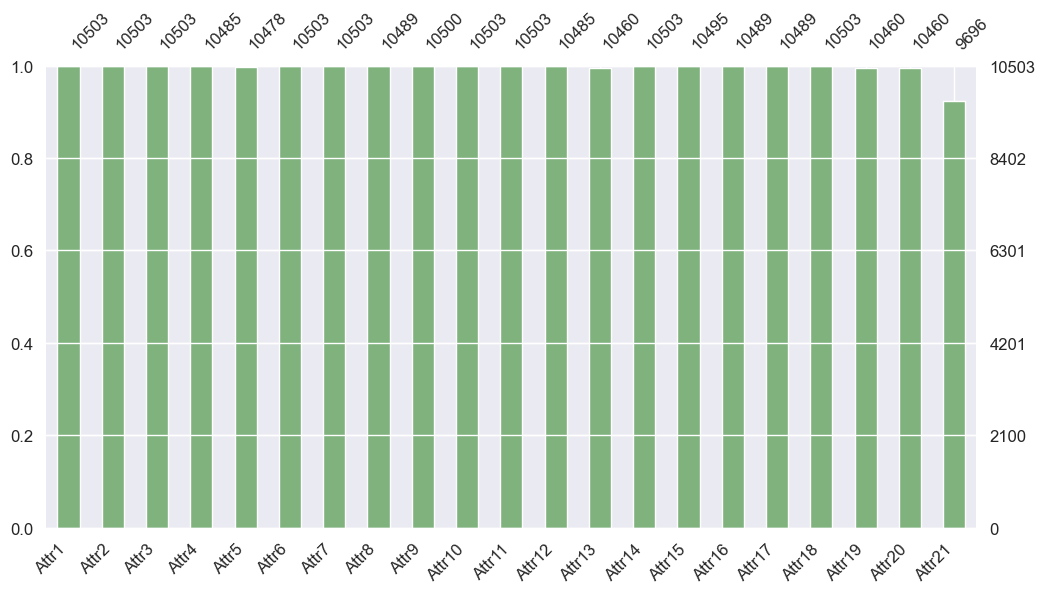

In [20]:
p_1 = msno.bar(df.iloc[:, np.r_[0:21]], figsize=(12,6), fontsize=12, color  = colors_palette3)

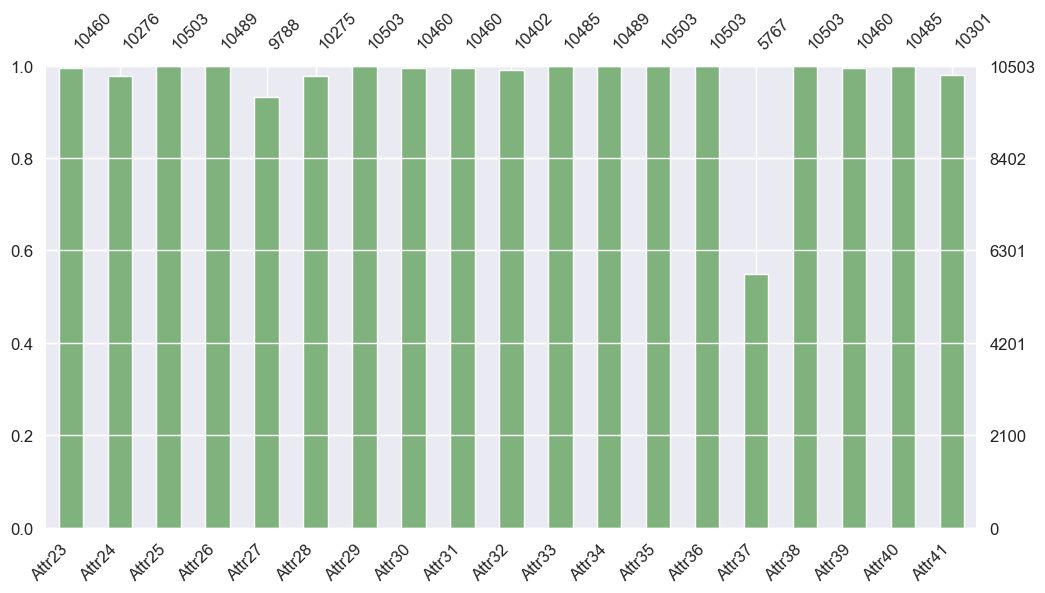

In [21]:
p_2 = msno.bar(df.iloc[:, np.r_[22:41]], figsize=(12,6), fontsize=12, color  = colors_palette3)

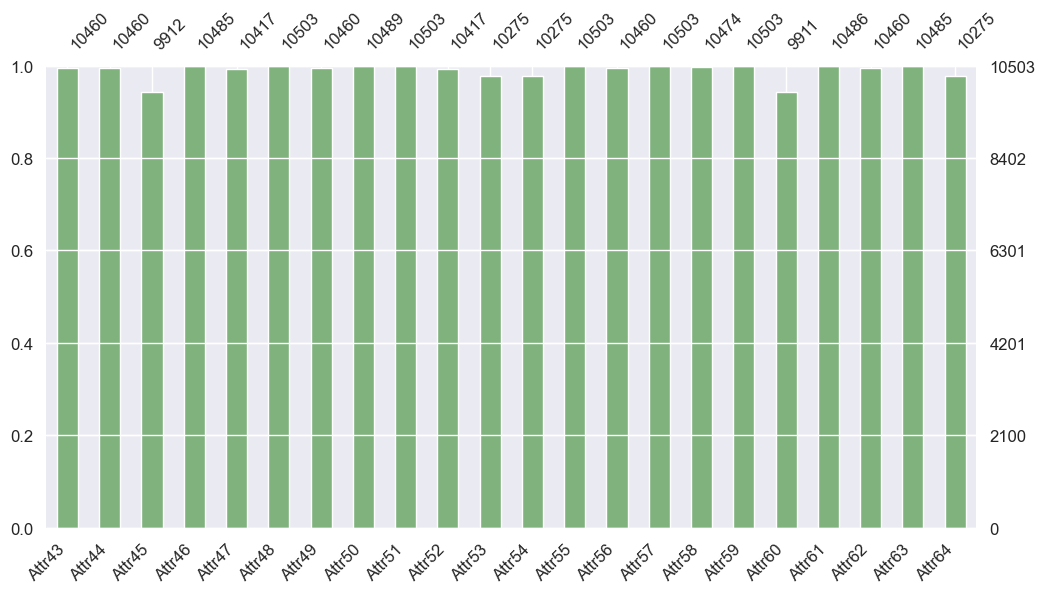

In [22]:
p_3 = msno.bar(df.iloc[:, np.r_[42:64]], figsize=(12,6), fontsize=12, color  = colors_palette3)

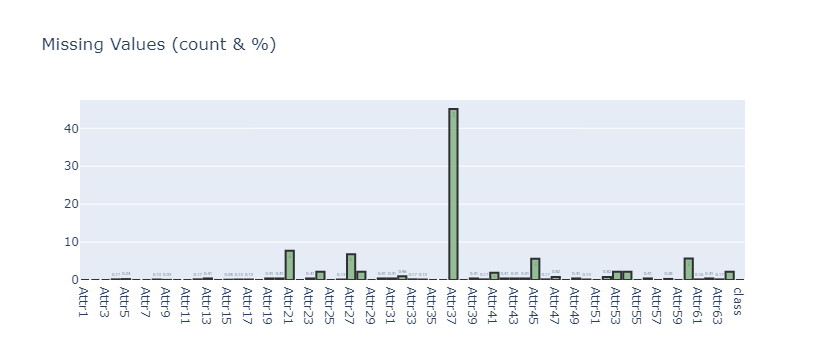

In [23]:
missing_percentage(df)

<b>Replace missing values with mean </b>

In [24]:
# duplicate original dataframe
df_missing = df.copy()

In [25]:
# replace missing values with mean
df_missing = df.fillna(df.mean())
df_missing.isna().sum()

Attr1     0
Attr2     0
Attr3     0
Attr4     0
Attr5     0
         ..
Attr61    0
Attr62    0
Attr63    0
Attr64    0
class     0
Length: 65, dtype: int64

<b> Check </b>

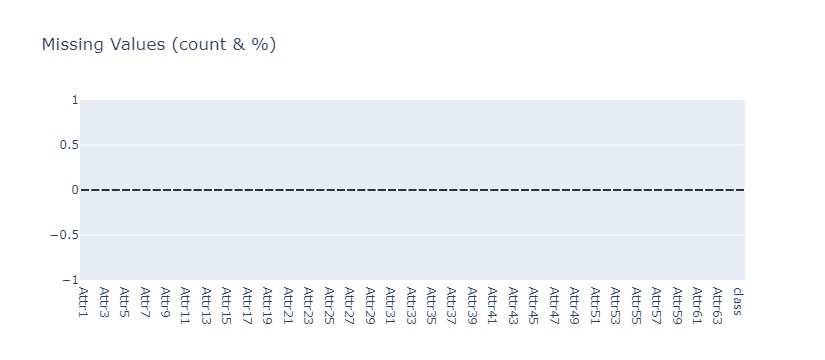

In [26]:
missing_percentage(df_missing)

Now, there is no missing data in the entire dataset

<h3><b>5. Outliers removal</b></h3>

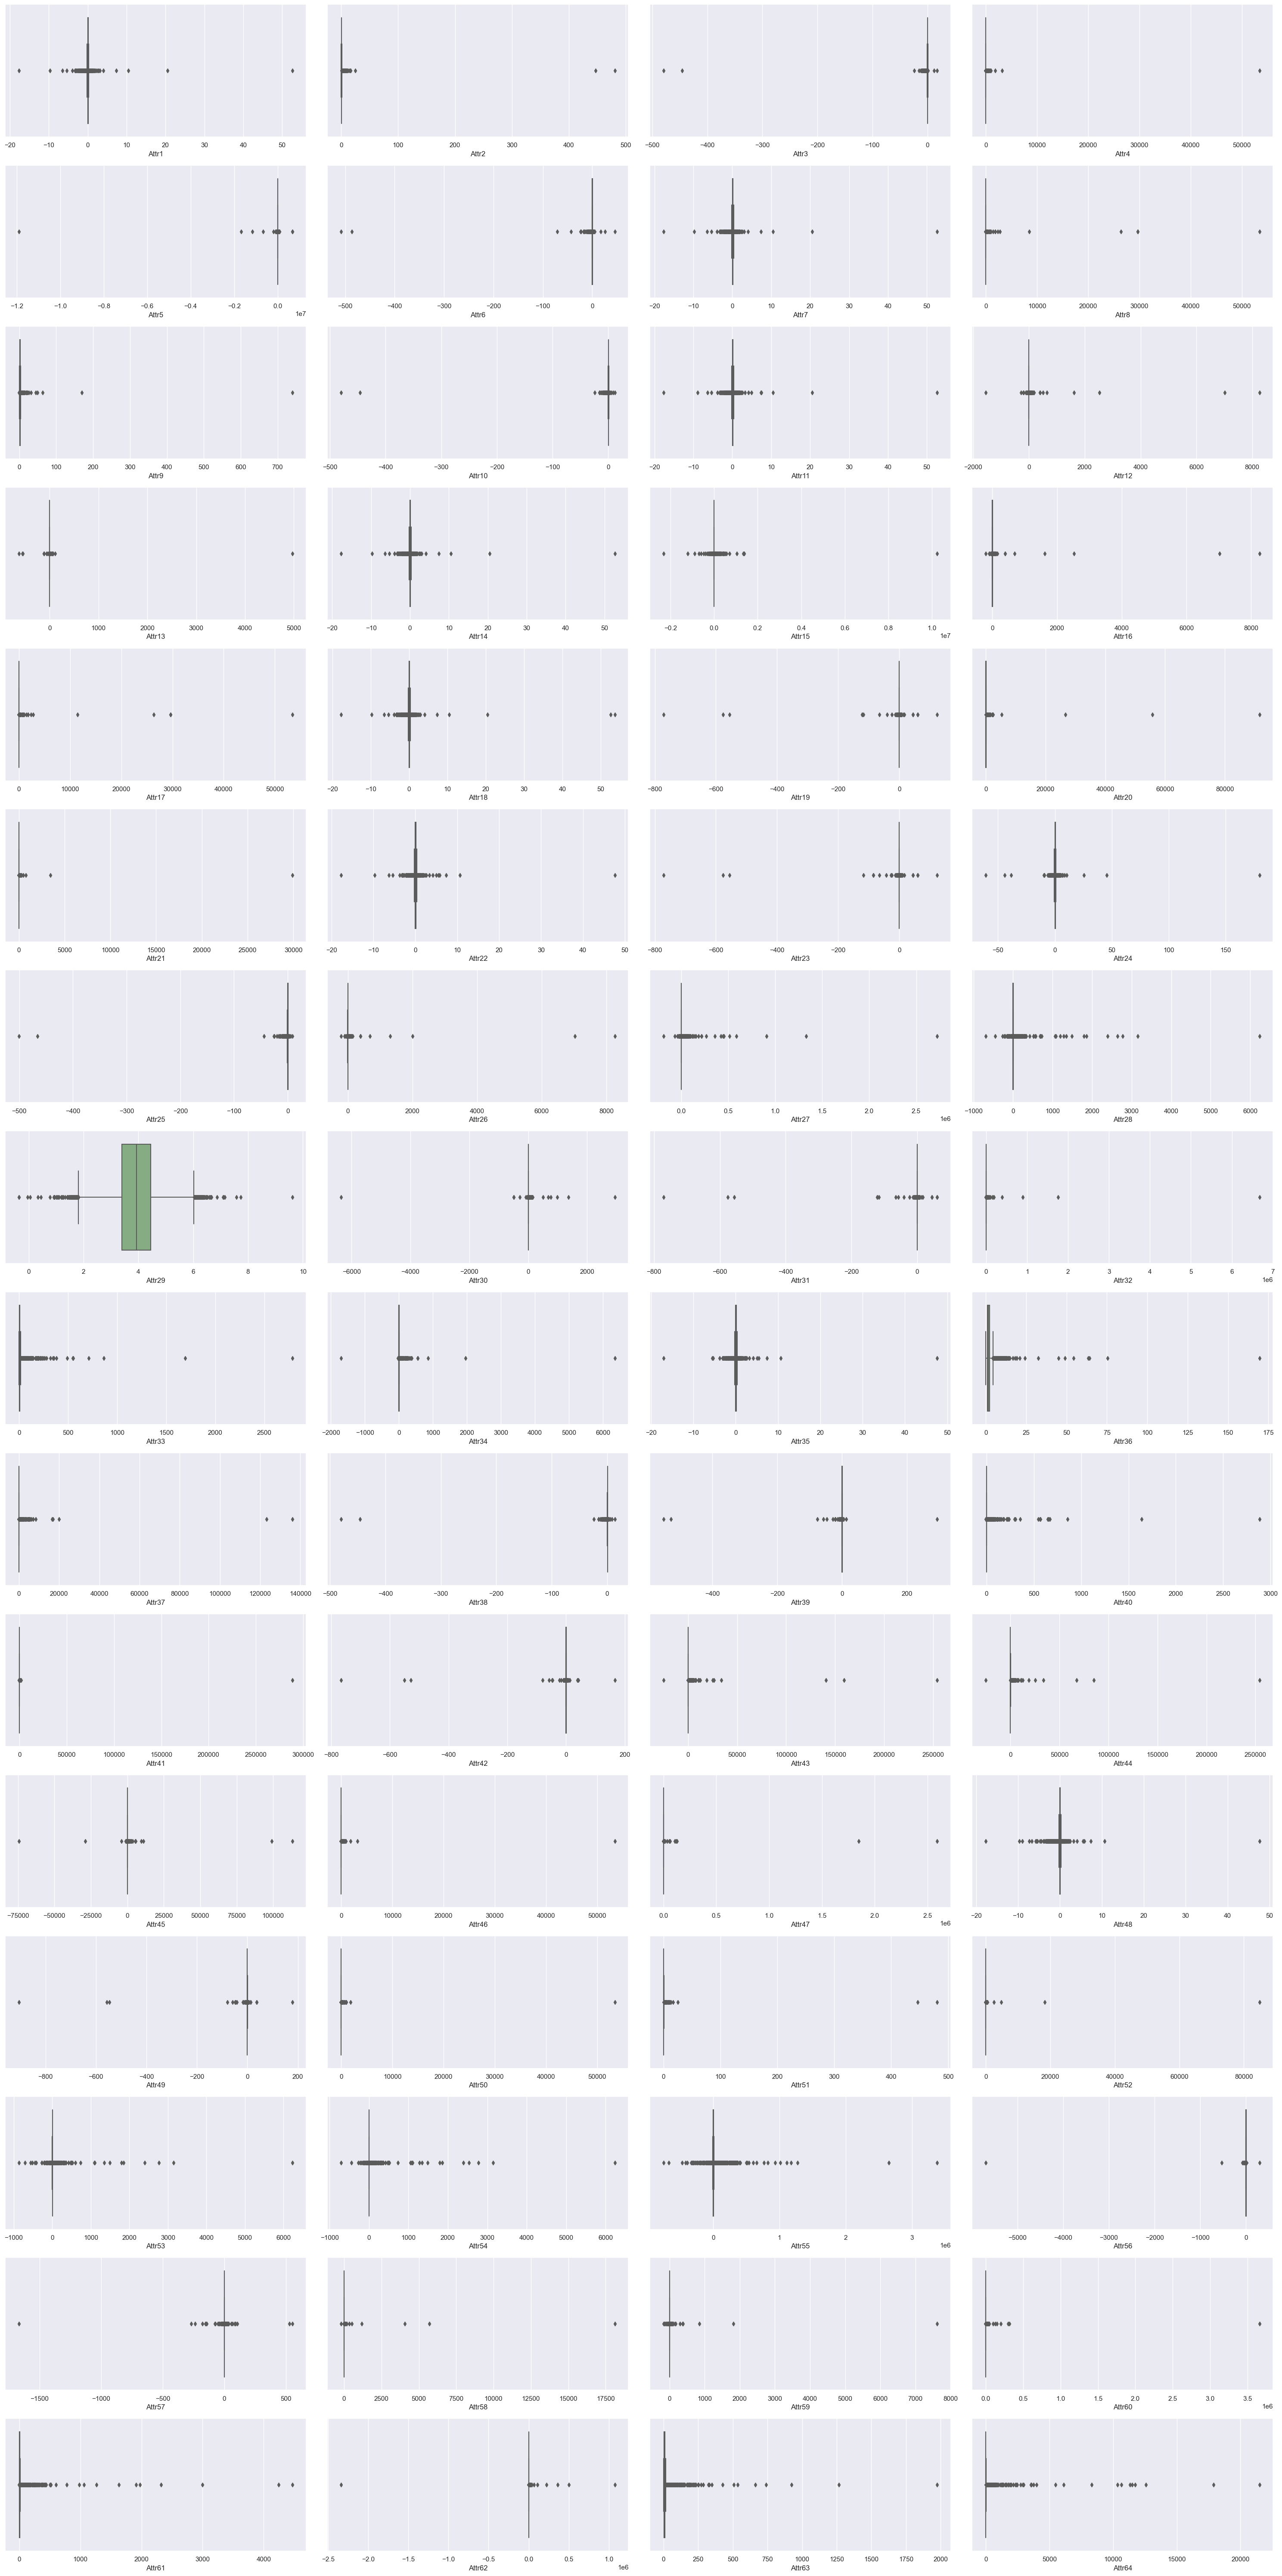

In [27]:
outliers_plot(df)

In [28]:
# duplicate original dataframe
df_outlier = df_missing.copy()

In [29]:
df_outlier = outliers_remove(df_missing)

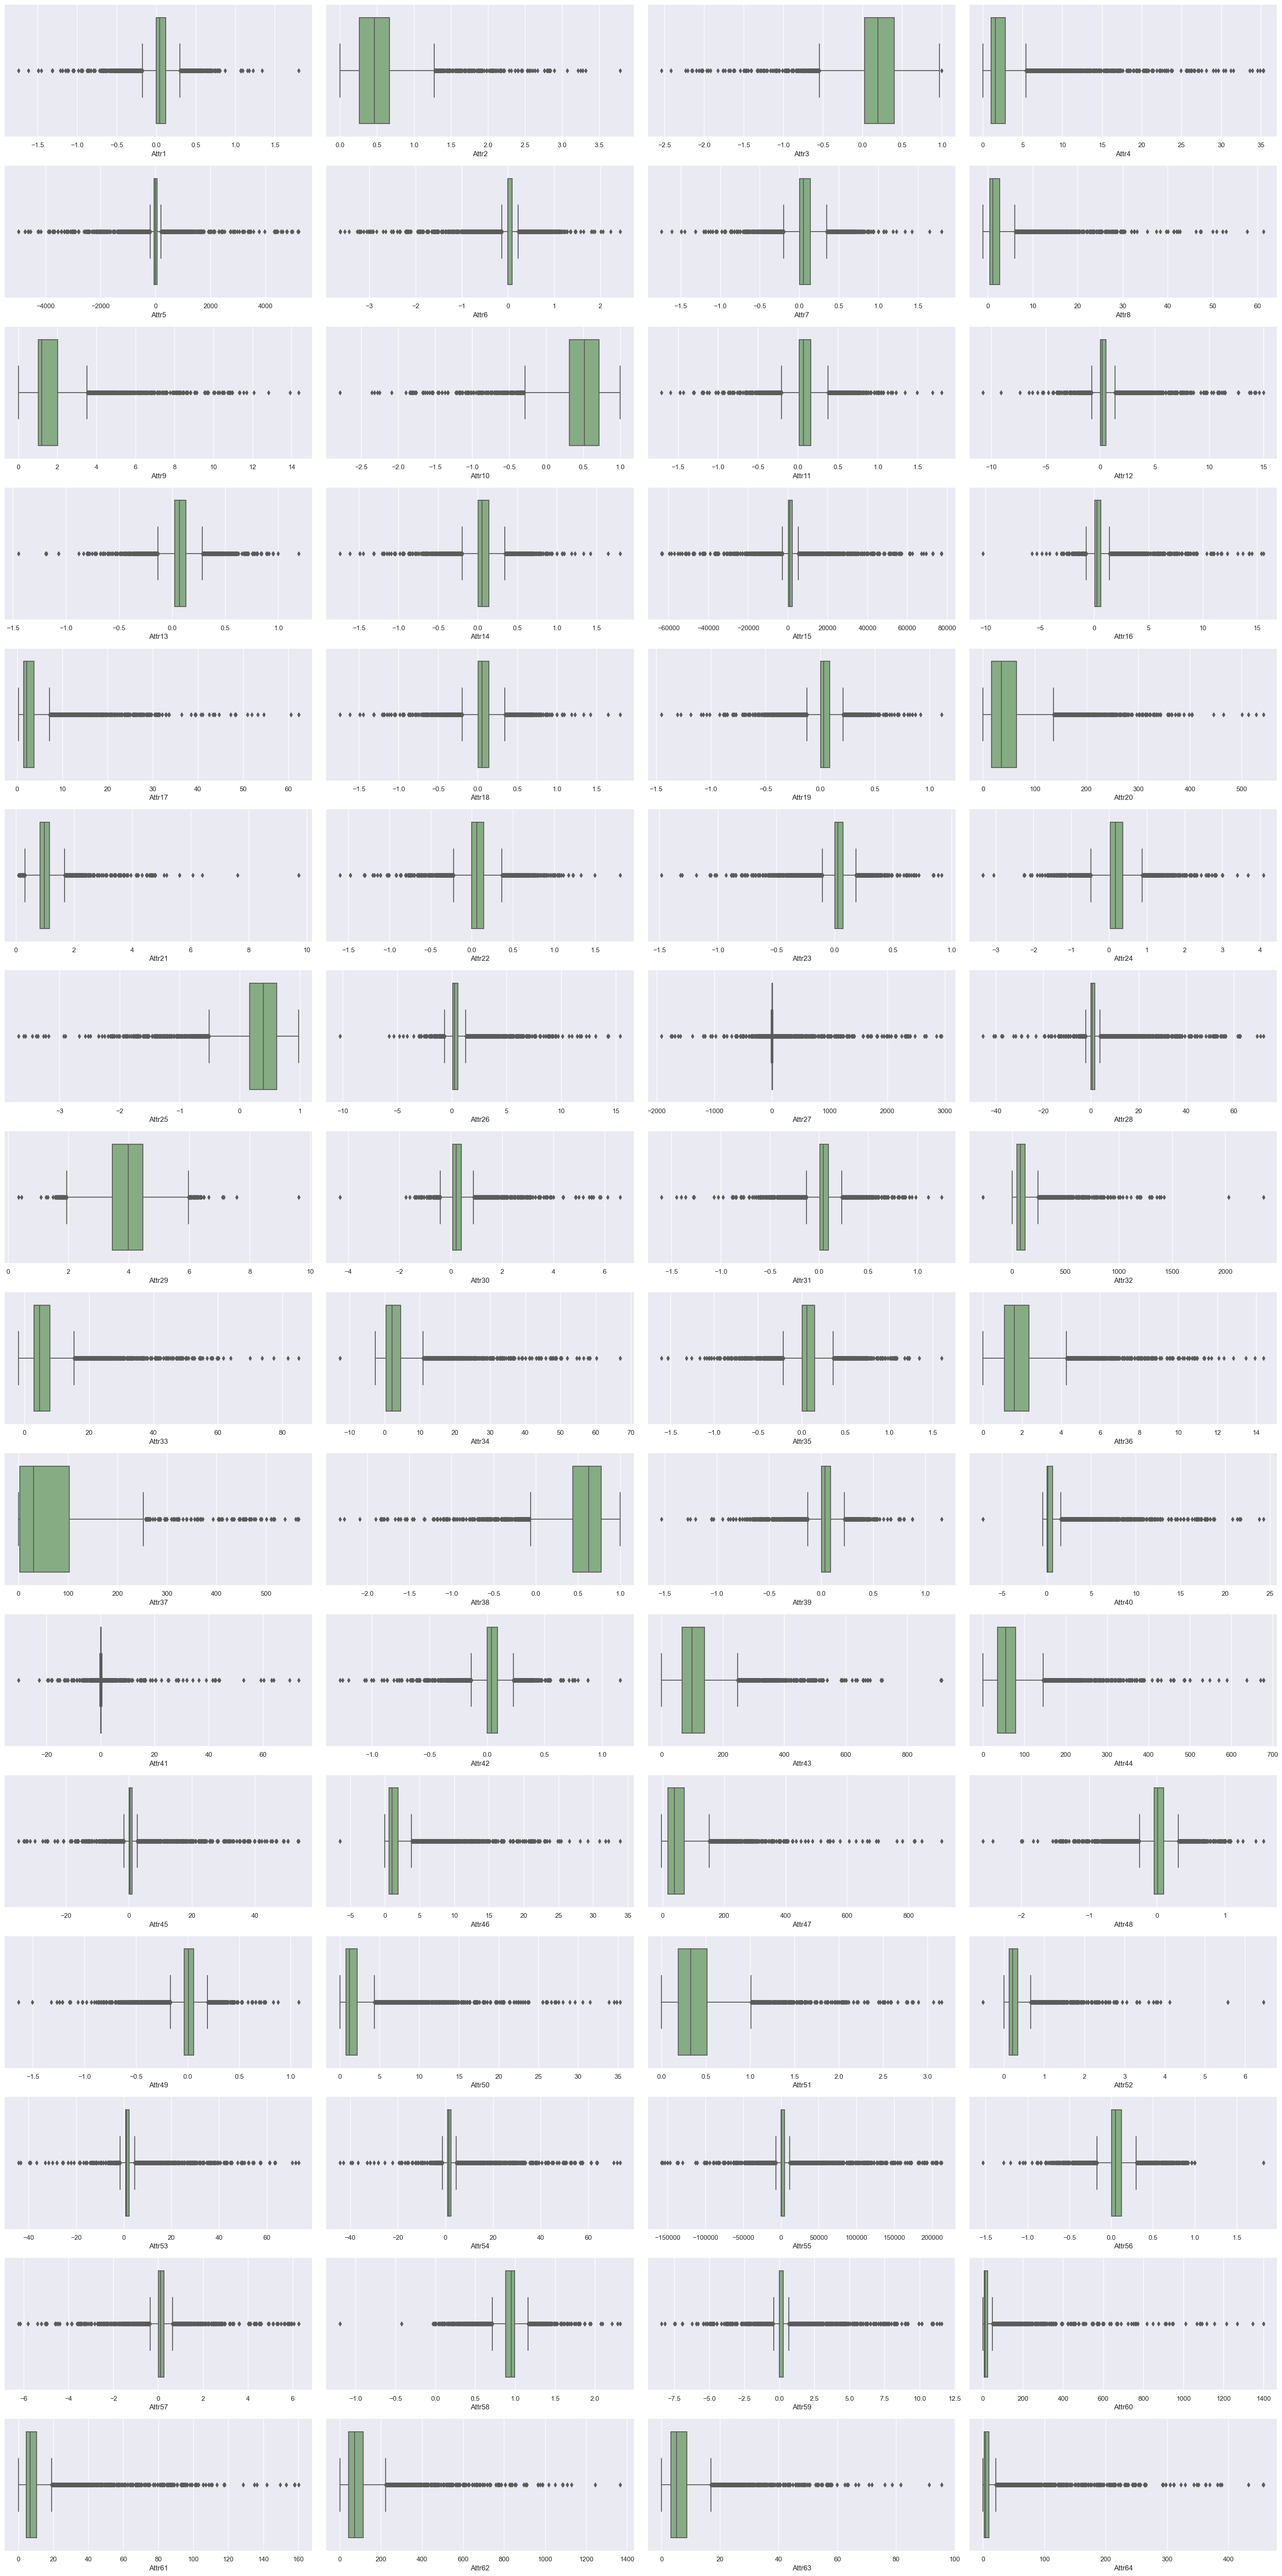

In [30]:
outliers_plot(df_outlier)

In [31]:
print('Original df.shape: {},-- New df.shape: {}, -- {} rows removed -- which is {}% of our data'.format(df.shape[0],df_outlier.shape[0],
                                                              df.shape[0]-df_outlier.shape[0],
                                                        (df.shape[0]-df_outlier.shape[0])/df.shape[0]*100))

Original df.shape: 10503,-- New df.shape: 9004, -- 1499 rows removed -- which is 14.272112729696277% of our data


In [32]:
df_outlier.value_counts('class')

class
0    8590
1     414
dtype: int64

<h3><b>6.Split data set to train set and test set </b></h3>

In [33]:
from visualization_bankruptcy import split_plot

In [34]:
def split_data(df):
    '''Split a dataset into train and test sets'''
    # split into input (X) and an output (Y)
    X = df.drop('class', axis=1)
    y = df['class']
     # Call train_test_split with the `stratify` parameter
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True,stratify=y)
    return X_train, X_test, y_train, y_test

In [35]:
# Call train_test_split with the `stratify` parameter
X_train, X_test, y_train, y_test = split_data(df_outlier)

In [36]:
y_train_vals = y_train.value_counts()
y_test_vals = y_test.value_counts()

In [37]:
# Check dimensions
print(np.shape(X_train))
print(np.shape(X_test))

print("Training set:")
print(f" + Non-defaulters (y=0): {y_train_vals[0]}")
print(f" + Defaulters (y=1):\t {y_train_vals[1]}")

print("Test set:")
print(f" + Non-defaulters (y=0): {y_test_vals[0]}")
print(f" + Defaulters (y=1):\t {y_test_vals[1]}")

(7203, 64)
(1801, 64)
Training set:
 + Non-defaulters (y=0): 6872
 + Defaulters (y=1):	 331
Test set:
 + Non-defaulters (y=0): 1718
 + Defaulters (y=1):	 83


<b> Using stratify for target </b>

This change ensures that the train and test sets follow the same distribution as our original dataset.

<h3><b>7. Feature selection </b></h3>

In [38]:
def plot_color_label_before(data, target):
    well_name = "RANDOM"
    highlight_colour = '#d95f02'
    non_highlight_colour = '#768493'

    data['colours'] = data['name'].apply(lambda x: highlight_colour if x == well_name else non_highlight_colour)


    data = data.sort_values(by='score')

    fig, ax = plt.subplots(figsize=(30,15))

    bars = plt.barh(data['name'], data['score'], height=0.7, color=data['colours'])

    ax.spines[['right', 'top', 'bottom']].set_visible(False) 
    ax.xaxis.set_visible(False)
    ax.yaxis.set_tick_params(labelsize=10)

    ax.bar_label(bars, padding=-45, color='white', 
                 fontsize=8, label_type='edge', fmt='%.3f%%',
                fontweight='bold')
    ax.set_title('Feature Importance', fontsize=16,
                  fontweight='bold', pad=20)
    plt.savefig("../img/randomfeature_bankruptcy.png")
    plt.show()
    

Duplicate train set and test set for feature selection

In [39]:
#for Pearson correlation
X_train_RF = X_train.copy()
X_test_RF = X_test.copy()

In [40]:
print(np.shape(X_train_RF))

(7203, 64)


<h4> Built-in Scikit-learn Method With A Random Feature </h4>

In [41]:
X_train_random = X_train.copy()
X_train_random["RANDOM"] = np.random.RandomState(42).randn(X_train.shape[0])

rf_random = RandomForestClassifier(n_estimators=100, random_state=42)
rf_random.fit(X_train_random, y_train.values.ravel())

global_importances_random = pd.Series(rf_random.feature_importances_, index=X_train_random.columns)
global_importances_random.sort_values(ascending=False, inplace=True)

In [42]:
global_importances_random

Attr27    0.090660
Attr34    0.046453
Attr46    0.036333
Attr21    0.029287
Attr58    0.024035
            ...   
Attr7     0.009195
Attr32    0.009090
Attr19    0.009073
Attr23    0.009024
Attr62    0.008019
Length: 65, dtype: float64

In [43]:
df_score = pd.DataFrame({'name':global_importances_random.index, 'score':global_importances_random.values})

In [44]:
df_score.to_markdown

<bound method DataFrame.to_markdown of       name     score
0   Attr27  0.090660
1   Attr34  0.046453
2   Attr46  0.036333
3   Attr21  0.029287
4   Attr58  0.024035
..     ...       ...
60   Attr7  0.009195
61  Attr32  0.009090
62  Attr19  0.009073
63  Attr23  0.009024
64  Attr62  0.008019

[65 rows x 2 columns]>

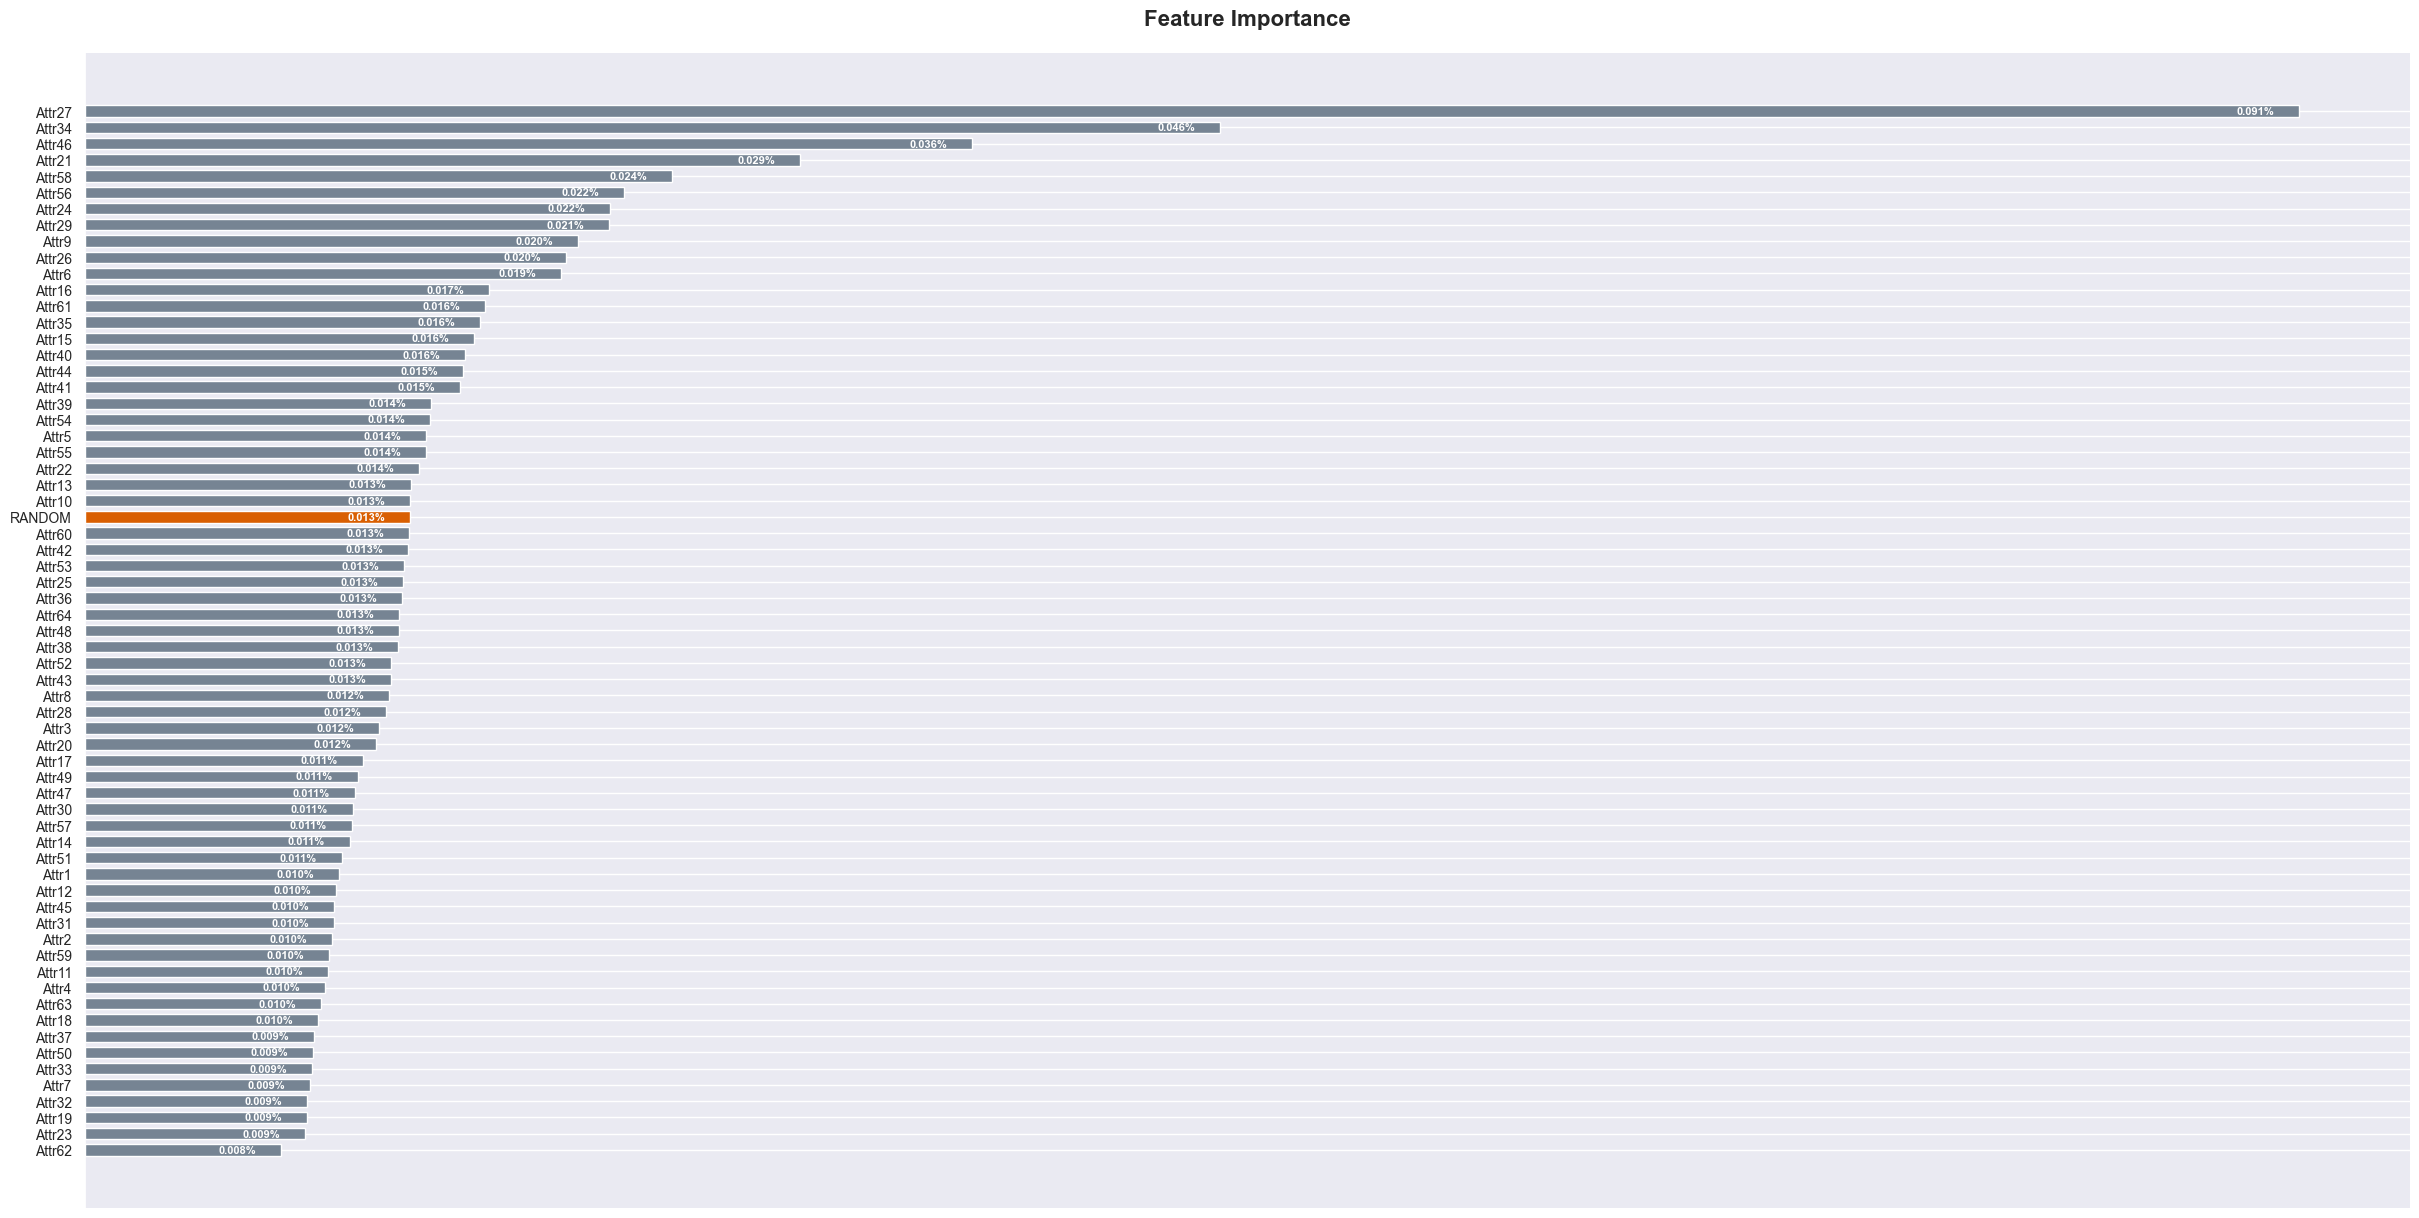

In [45]:
plot_color_label_before(df_score, 'RANDOM')

In [46]:
df_score.index[df_score['name']=='RANDOM'].tolist()

[25]

<h4> Permutation Feature Importance ((Better, but slower) </h4>

In [47]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train.values.ravel())

result = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)

# Clean data
sorted_idx = result.importances_mean.argsort()[::-1]
pfi_df = pd.DataFrame(data=result.importances[sorted_idx].T, columns=X_test.columns[sorted_idx])

# perm_importances = result.importances_mean
# perm_std = result.importances_std
# sorted_idx = perm_importances.argsort()
# feature_names = X_test.columns

# df_score2 = pd.DataFrame({'Importance': perm_importances, 'Std': perm_std}, index=feature_names[sorted_idx]).sort_values('Importance',ascending=True)

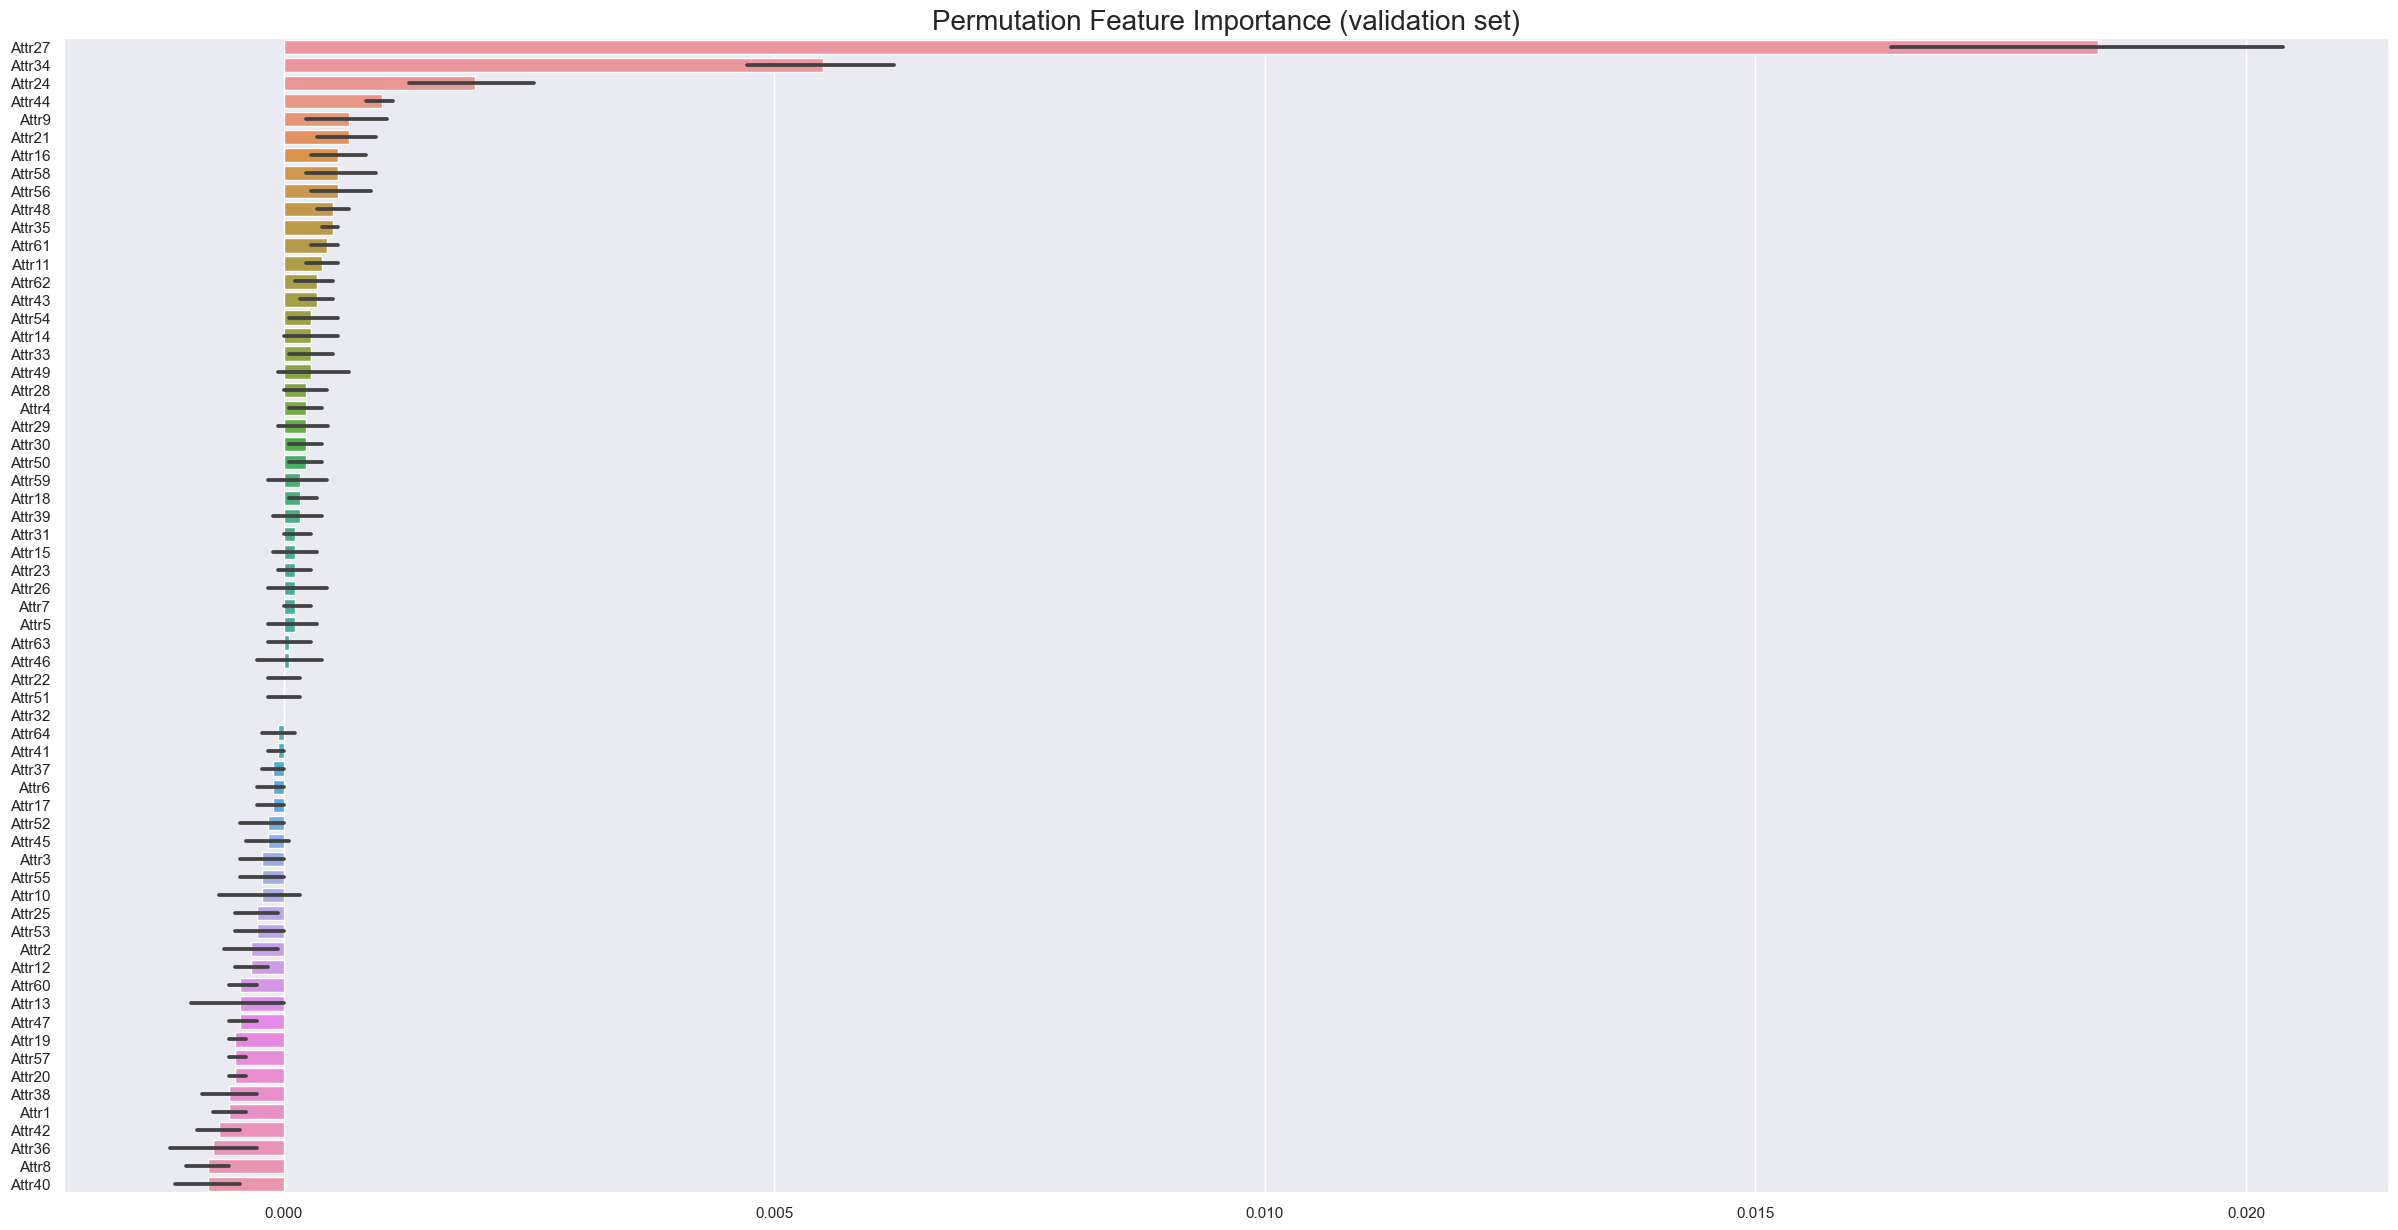

In [48]:
# Plot (This can be barplot, boxplot, violinplot,...)
plt.figure(figsize=(30,15))
sns.barplot(data=pfi_df, orient="h").set_title("Permutation Feature Importance (validation set)",  fontsize=20)
plt.savefig("../img/permutationfeature_bankruptcy.png")

<h4>Random Forest Feature Importance With SHAP </h4>

In [49]:
import shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [50]:
# load JS visualization code to notebook
shap.initjs()

In [51]:
# creating an explainer for our model
explainer = shap.TreeExplainer(rf) # we only need to pass our  fitted model to tree explainer. 
                                    #No background dataset in 'data' argument required for tree models as it
                                    #is automatically received through the model tree object.

# finding out the shap values using the explainer
shap_values = explainer.shap_values(X_train)

# Expected/Base/Reference value = the value that would be predicted if we didn’t know any features of the current output”
print('Expected Value:', explainer.expected_value)

Expected Value: [0.95365959 0.04634041]


In [52]:
# Shap Values for class =0 that is  class
print("Shap Values for '0' class")
pd.DataFrame(shap_values[0],columns=X_train.columns).head()

Shap Values for '0' class


Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0 -0.002762  0.008949  0.000543  0.001638 -0.001154  0.000032 -0.001359   
1  0.000193  0.003426 -0.005112  0.001216  0.002700  0.001948  0.001081   
2 -0.002134  0.007568 -0.001519  0.002518 -0.001853 -0.010042  0.001531   
3 -0.001376  0.004619  0.000374 -0.001371 -0.000881  0.002899 -0.004489   
4  0.000969  0.006964 -0.000397  0.001597 -0.000422  0.000649 -0.001660   

      Attr8     Attr9    Attr10  ...    Attr55    Attr56    Attr57    Attr58  \
0 -0.001287  0.003094  0.001106  ... -0.000313 -0.001280  0.000671 -0.002235   
1 -0.000861  0.005711  0.005032  ... -0.004234  0.001257  0.003368 -0.010373   
2 -0.002264 -0.002474 -0.001805  ...  0.000525 -0.001306 -0.002043 -0.002926   
3  0.000838 -0.002873  0.001816  ...  0.002541  0.004199  0.001831 -0.001427   
4 -0.000004  0.002327  0.002578  ...  0.001896 -0.001343 -0.001113 -0.005384   

     Attr59    Attr60    Attr61    Attr62    Attr63    Attr64  
0 -0.000124 -0.001508 -0.001997  0.001224 -0.001958 -0.000201  
1  0.003133  0.000253  0.000857 -0.003554 -0.000105 -0.002439  
2  0.000756  0.001520 -0.002503  0.003048 -0.001763  0.002846  
3  0.001662  0.000467 -0.000478  0.000278  0.000312  0.000530  
4  0.001056  0.000298 -0.001299  0.001852  0.000991 -0.000364  

[5 rows x 64 columns]

In [53]:
# Shap Values for class =1 that is  class
print("Shap Values for '1' class")
pd.DataFrame(shap_values[1],columns=X_train.columns).head()

Shap Values for '1' class


Attr1     Attr2     Attr3     Attr4     Attr5     Attr6     Attr7  \
0  0.002762 -0.008949 -0.000543 -0.001638  0.001154 -0.000032  0.001359   
1 -0.000193 -0.003426  0.005112 -0.001216 -0.002700 -0.001948 -0.001081   
2  0.002134 -0.007568  0.001519 -0.002518  0.001853  0.010042 -0.001531   
3  0.001376 -0.004619 -0.000374  0.001371  0.000881 -0.002899  0.004489   
4 -0.000969 -0.006964  0.000397 -0.001597  0.000422 -0.000649  0.001660   

      Attr8     Attr9    Attr10  ...    Attr55    Attr56    Attr57    Attr58  \
0  0.001287 -0.003094 -0.001106  ...  0.000313  0.001280 -0.000671  0.002235   
1  0.000861 -0.005711 -0.005032  ...  0.004234 -0.001257 -0.003368  0.010373   
2  0.002264  0.002474  0.001805  ... -0.000525  0.001306  0.002043  0.002926   
3 -0.000838  0.002873 -0.001816  ... -0.002541 -0.004199 -0.001831  0.001427   
4  0.000004 -0.002327 -0.002578  ... -0.001896  0.001343  0.001113  0.005384   

     Attr59    Attr60    Attr61    Attr62    Attr63    Attr64  
0  0.000124  0.001508  0.001997 -0.001224  0.001958  0.000201  
1 -0.003133 -0.000253 -0.000857  0.003554  0.000105  0.002439  
2 -0.000756 -0.001520  0.002503 -0.003048  0.001763 -0.002846  
3 -0.001662 -0.000467  0.000478 -0.000278 -0.000312 -0.000530  
4 -0.001056 -0.000298  0.001299 -0.001852 -0.000991  0.000364  

[5 rows x 64 columns]

In [54]:
#Force Plot for a single observation for a single class 0
shap.initjs()
shap.force_plot(explainer.expected_value[0],
shap_values[0][0,:], X_train.iloc[0])

In [55]:
#Force Plot for a single observation for a single class 3
shap.initjs()
shap.force_plot(explainer.expected_value[1],
shap_values[1][0,:], X_train.iloc[0,:])

In [56]:
X_train.shape

(7203, 64)

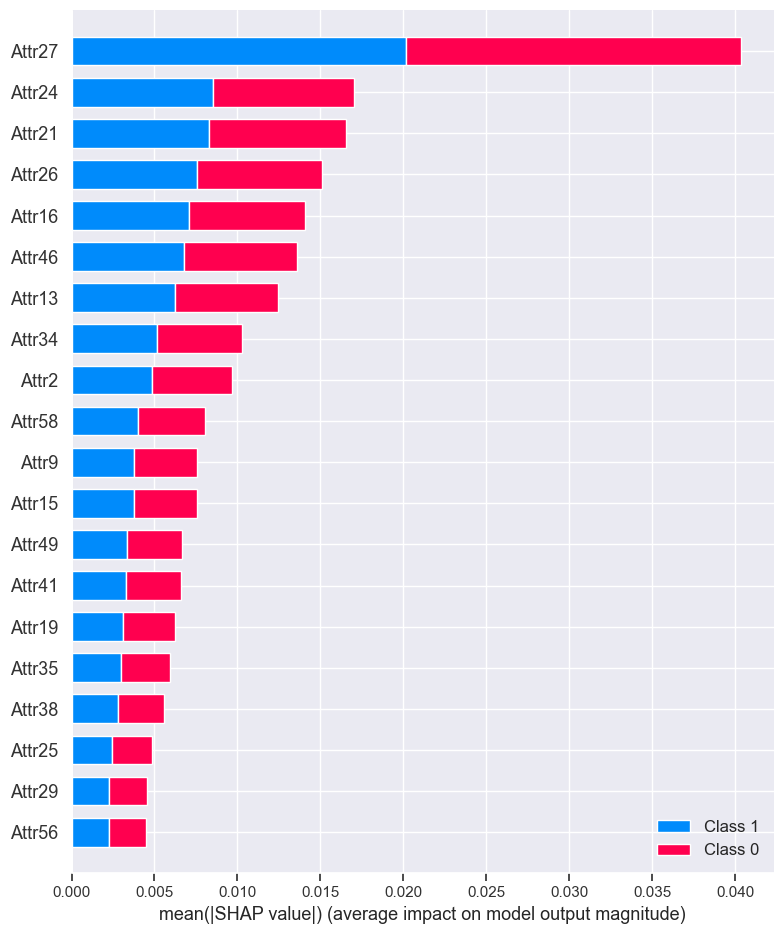

In [57]:
shap.initjs()
shap.summary_plot(shap_values, X_train)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


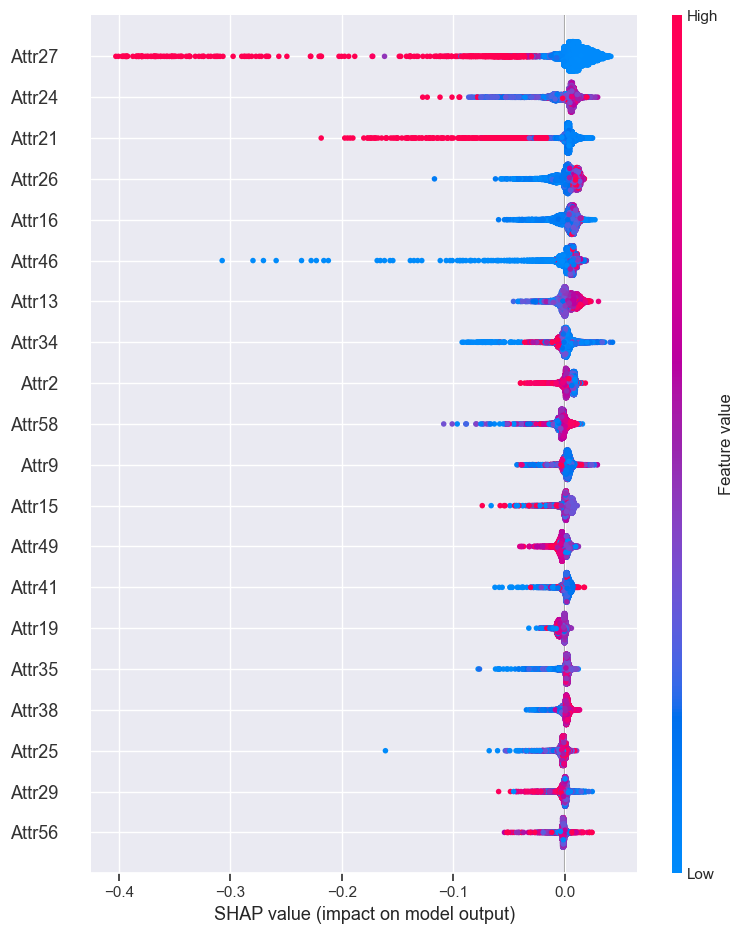

In [58]:
shap.initjs()
shap.summary_plot(shap_values[0], X_train)

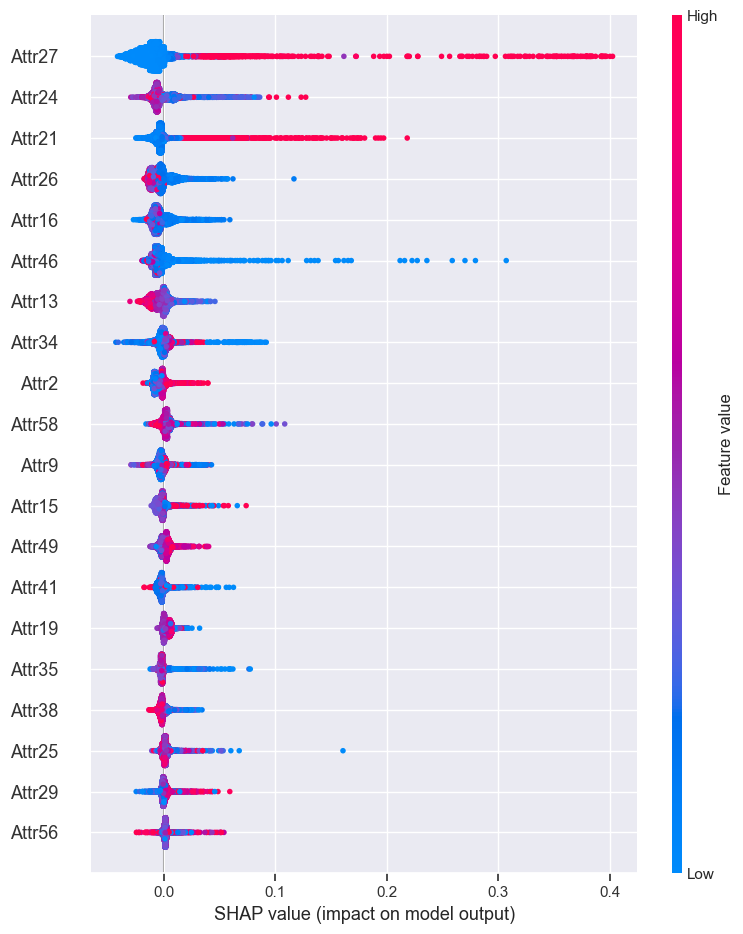

In [59]:
shap.initjs()
shap.summary_plot(shap_values[1], X_train)

The code isn't too complex. But there are a few caveats.

When plotting, we call shap_values[1]. For classification problems, there is a separate array of SHAP values for each possible outcome. In this case, we index in to get the SHAP values for the prediction of "True".
Calculating SHAP values can be slow. It isn't a problem here, because this dataset is small. But you'll want to be careful when running these to plot with reasonably sized datasets. The exception is when using an xgboost model, which SHAP has some optimizations for and which is thus much faster.
This provides a great overview of the model, but we might want to delve into a single feature. That's where SHAP dependence contribution plots come into play.

In [60]:
# cols_name = [elt for elt in feature_scores.index if feature_scores[elt] >= 0.015]

In [61]:
# cols_name

In [62]:
cols_name =df_score['name'][:30]
cols_name

0     Attr27
1     Attr34
2     Attr46
3     Attr21
4     Attr58
5     Attr56
6     Attr24
7     Attr29
8      Attr9
9     Attr26
10     Attr6
11    Attr16
12    Attr61
13    Attr35
14    Attr15
15    Attr40
16    Attr44
17    Attr41
18    Attr39
19    Attr54
20     Attr5
21    Attr55
22    Attr22
23    Attr13
24    Attr10
25    RANDOM
26    Attr60
27    Attr42
28    Attr53
29    Attr25
Name: name, dtype: object

In [63]:
len(cols_name)

30

In [64]:
X_train_RF = X_train.drop(columns=X_train.columns.difference(cols_name))
X_test_RF = X_test.drop(columns=X_test.columns.difference(cols_name))

In [65]:
X_train_RF = X_train.drop(columns=X_train.columns.difference(cols_name))
X_test_RF = X_test.drop(columns=X_test.columns.difference(cols_name))

In [66]:
X_train_RF.shape

(7203, 29)

In [67]:
X_test_RF.shape

(1801, 29)

<h3><b>8. Data Scaling </b></h3>

In [68]:
sc_X = StandardScaler()

Data Scaling for 30 features dataset

In [69]:
X_train_RF_standardized = sc_X.fit_transform(X_train_RF)
X_test_RF_standardized = sc_X.transform(X_test_RF)

<h3><b>9. Sampling (SMOTETomek)</b></h3>

In [70]:
print("Shape of the X_train before applying SMOTETomek is: ", X_train_RF_standardized .shape)
print("Shape of the y_train data before applying SMOTETomek is: ", y_train.shape)
print("Shape of the X_test before applying SMOTETomek is: ", X_test_RF_standardized.shape)
print("Shape of the y_test before applying SMOTETomek is: ", y_test.shape)
print()
print("Before applying SMOTETomek the count of the fraud cases are: ", y_train.value_counts().values[1])
print("Before applying SMOTETomek the count of the non-fraud cases are: ", y_train.value_counts().values[0])
print("Before applying SMOTETomek the percentage of the fraud cases are: ", sum(y_train == 1)/ len(y_train) * 100.0)
print("Before applying SMOTETomek the percentage of the non-fraud cases are: ", sum(y_train == 0)/ len(y_train) * 100.0)
print("Original dataset shape %s" % Counter(y_train))

sm =SMOTETomek(random_state=42)

X_train_RF_s, y_train_RF_s = sm.fit_resample(X_train_RF_standardized, y_train)

print("Shape of the X_train after applying SMOTETomek is: ", X_train_RF_s.shape)
print("Shape of the y_train data after applying SMOTETomek is: ", y_train_RF_s.shape)
print()
print("After applying SMOTETomek the count of the fraud cases are: ", sum(y_train_RF_s == 1))
print("After applying SMOTETomek the count of the non-fraud cases are: ", sum(y_train_RF_s == 0))
print("After applying SMOTETomek the percentage of the fraud cases are: ", sum(y_train_RF_s == 1)/ len(y_train_RF_s) * 100.0)
print("After applying SMOTETomek the percentage of the non-fraud cases are: ", sum(y_train_RF_s == 0)/ len(y_train_RF_s) * 100.0)

print("Resampled dataset shape %s" % Counter(y_train_RF_s))

Shape of the X_train before applying SMOTETomek is:  (7203, 29)
Shape of the y_train data before applying SMOTETomek is:  (7203,)
Shape of the X_test before applying SMOTETomek is:  (1801, 29)
Shape of the y_test before applying SMOTETomek is:  (1801,)

Before applying SMOTETomek the count of the fraud cases are:  331
Before applying SMOTETomek the count of the non-fraud cases are:  6872
Before applying SMOTETomek the percentage of the fraud cases are:  4.5953075107594055
Before applying SMOTETomek the percentage of the non-fraud cases are:  95.40469248924059
Original dataset shape Counter({0: 6872, 1: 331})
Shape of the X_train after applying SMOTETomek is:  (13722, 29)
Shape of the y_train data after applying SMOTETomek is:  (13722,)

After applying SMOTETomek the count of the fraud cases are:  6861
After applying SMOTETomek the count of the non-fraud cases are:  6861
After applying SMOTETomek the percentage of the fraud cases are:  50.0
After applying SMOTETomek the percentage of th

<h3><b>10. Save dataframe </b></h3>

In [71]:
# train set and test set
pd.DataFrame(X_train_RF_s).to_csv('../train_test_set/X_train_bankruptcy.csv', index=False)
pd.DataFrame(X_test_RF_standardized).to_csv('../train_test_set/X_test_bankruptcy.csv', index=False)
pd.DataFrame(y_train_RF_s).to_csv('../train_test_set/y_train_bankruptcy.csv', index=False)
pd.DataFrame(y_test).to_csv('../train_test_set/y_test_bankruptcy.csv', index=False)